In [5]:
import numpy as np

import gym
import stable_baselines
from stable_baselines import A2C, ACER, ACKTR, DQN, DDPG, SAC, PPO1, PPO2, TD3, TRPO
from stable_baselines.common.env_checker import check_env
from stable_baselines.common.policies import MlpPolicy

import fakegym as fg
import importlib

In [10]:
importlib.reload(fg)

class MyObservation():
    def __init__(self, env):
        self.env = env
        self.gps_actual = None
        self.gps_target = None
        # self.distance = None
        # self.touching = None

    def _update(self):
        self.gps_actual = self.env.state_object.gps_actual
        self.gps_target = self.env.state_object.gps_target
        # self.distance = self.env.state_object.distance
        # self.touching = self.env.state_object.touching

    def shape(self):
        """Make sure length is correct here.In this example:
        gps_actual: 2
        gps_target: 2
        distance:   4
        touching:   1
        =================
                   (9, )
        
        """
        return (4, )

    def get(self, env):
        """Get observation as numpy array."""
        self._update()
        
        arr = np.empty(0)
        arr = np.hstack((arr, np.array(self.gps_actual)))
        arr = np.hstack((arr, np.array(self.gps_target)))
        # arr = np.hstack((arr, np.array(self.distance)))
        # arr = np.hstack((arr, np.array(self.touching)))
        
        return arr
    

class MyEnv(fg.FakeGym):
    def __init__(self, seed=None, N=8, num_of_sensors=4, obstacles_each=0,
                 step_range=(1, 1), action_type="discrete",
                 discrete_action_shaping="flatten", obs=MyObservation):
        super(MyEnv, self).__init__(seed, N, num_of_sensors, obstacles_each, step_range, action_type, discrete_action_shaping, obs)
        

    def calc_reward(self):
        """Calculate reward function.

        Idea(Mats):
        

        """
        if self.gps_actual == self.gps_target:
            reward = 1000
        else:
            target_distance = self.get_target_distance()
            max_distance = 8
            reward = -1 * np.tanh(target_distance/(max_distance/2))
            if self.com.touching:
                reward = reward - 10
        return reward
        
        
    def check_done(self):
        if self.com.time_steps == 100:
            return True
        if self.gps_actual == self.gps_target:
            return True
        return False


env = MyEnv()
check_env(env)

AttributeError: 'FakeCom' object has no attribute 'touching'

In [11]:
time_steps = 20*10**4
reward_function = "nReward2"
fake = "WebotFakeMini"
name = "TRPO_pj1"
model_name = "DQN_{}_{}_{}_{}".format(fake, name, reward_function, time_steps)

model = PPO1("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=time_steps, log_interval=100)
model.save("models/{}".format(model_name))
del model

********** Iteration 0 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00311 |      -0.01384 |      2.74e+04 |       0.00168 |       1.38427
     -0.02138 |      -0.01374 |      2.71e+04 |       0.01098 |       1.37421
     -0.02753 |      -0.01360 |      2.68e+04 |       0.02463 |       1.36019
     -0.02776 |      -0.01359 |      2.65e+04 |       0.02640 |       1.35874
Evaluating losses...
     -0.03043 |      -0.01364 |      2.63e+04 |       0.02165 |       1.36359
----------------------------------
| EpThisIter      | 0            |
| EpisodesSoFar   | 0            |
| TimeElapsed     | 1.33         |
| TimestepsSoFar  | 256          |
| ev_tdlam_before | -0.000806    |
| loss_ent        | 1.3635871    |
| loss_kl         | 0.021649448  |
| loss_pol_entpen | -0.013635872 |
| loss_pol_surr   | -0.030426703 |
| loss_vf_loss    | 26335.21     |
----------------------------------
********** Iteration 1 ************
Optim

     -0.00775 |      -0.01345 |      1.18e+05 |       0.00142 |       1.34501
     -0.01570 |      -0.01340 |      1.17e+05 |       0.00652 |       1.34046
     -0.01558 |      -0.01334 |      1.17e+05 |       0.01368 |       1.33406
Evaluating losses...
     -0.01907 |      -0.01331 |      1.17e+05 |       0.01531 |       1.33128
----------------------------------
| EpLenMean       | 200          |
| EpRewMean       | -1.08e+03    |
| EpThisIter      | 4            |
| EpisodesSoFar   | 11           |
| TimeElapsed     | 7.48         |
| TimestepsSoFar  | 2304         |
| ev_tdlam_before | 0.000704     |
| loss_ent        | 1.3312836    |
| loss_kl         | 0.015309546  |
| loss_pol_entpen | -0.013312835 |
| loss_pol_surr   | -0.019066917 |
| loss_vf_loss    | 117094.0     |
----------------------------------
********** Iteration 9 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00275 |      -0.01328 |      2.67e+04 |  

     -0.01239 |      -0.01318 |      6.88e+04 |       0.00527 |       1.31789
     -0.01887 |      -0.01302 |      6.88e+04 |       0.01594 |       1.30244
     -0.02572 |      -0.01298 |      6.88e+04 |       0.01681 |       1.29837
Evaluating losses...
     -0.03407 |      -0.01301 |      6.88e+04 |       0.01287 |       1.30119
---------------------------------
| EpLenMean       | 187         |
| EpRewMean       | -986        |
| EpThisIter      | 2           |
| EpisodesSoFar   | 23          |
| TimeElapsed     | 14.1        |
| TimestepsSoFar  | 4352        |
| ev_tdlam_before | -0.00118    |
| loss_ent        | 1.3011881   |
| loss_kl         | 0.012873812 |
| loss_pol_entpen | -0.01301188 |
| loss_pol_surr   | -0.03406568 |
| loss_vf_loss    | 68755.88    |
---------------------------------
********** Iteration 17 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00072 |      -0.01312 |      4.85e+04 |      9.38e-05 

     -0.00132 |      -0.01331 |      2.62e+04 |       0.00215 |       1.33058
     -0.01015 |      -0.01322 |      2.60e+04 |       0.00562 |       1.32174
     -0.01315 |      -0.01325 |      2.59e+04 |       0.00572 |       1.32549
Evaluating losses...
     -0.01584 |      -0.01325 |      2.59e+04 |       0.00734 |       1.32523
----------------------------------
| EpLenMean       | 206          |
| EpRewMean       | -1.21e+03    |
| EpThisIter      | 0            |
| EpisodesSoFar   | 28           |
| TimeElapsed     | 20.8         |
| TimestepsSoFar  | 6400         |
| ev_tdlam_before | -4.65e-05    |
| loss_ent        | 1.325228     |
| loss_kl         | 0.0073445016 |
| loss_pol_entpen | -0.01325228  |
| loss_pol_surr   | -0.0158408   |
| loss_vf_loss    | 25867.883    |
----------------------------------
********** Iteration 25 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00082 |      -0.01314 |      2.62e+04 | 

     -0.00592 |      -0.01366 |      4.83e+04 |       0.00112 |       1.36582
     -0.01456 |      -0.01361 |      4.82e+04 |       0.00343 |       1.36143
     -0.02223 |      -0.01354 |      4.82e+04 |       0.00781 |       1.35387
Evaluating losses...
     -0.02410 |      -0.01348 |      4.82e+04 |       0.01186 |       1.34773
----------------------------------
| EpLenMean       | 236          |
| EpRewMean       | -1.57e+03    |
| EpThisIter      | 1            |
| EpisodesSoFar   | 35           |
| TimeElapsed     | 27.5         |
| TimestepsSoFar  | 8448         |
| ev_tdlam_before | -2.98e-06    |
| loss_ent        | 1.34773      |
| loss_kl         | 0.0118635    |
| loss_pol_entpen | -0.013477299 |
| loss_pol_surr   | -0.024096036 |
| loss_vf_loss    | 48200.21     |
----------------------------------
********** Iteration 33 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00450 |      -0.01355 |      2.59e+04 | 

     -0.01090 |      -0.01246 |      4.94e+04 |       0.00517 |       1.24590
     -0.01170 |      -0.01236 |      4.93e+04 |       0.01260 |       1.23587
     -0.01554 |      -0.01230 |      4.93e+04 |       0.01233 |       1.23020
Evaluating losses...
     -0.02244 |      -0.01230 |      4.93e+04 |       0.00860 |       1.23020
----------------------------------
| EpLenMean       | 214          |
| EpRewMean       | -1.32e+03    |
| EpThisIter      | 1            |
| EpisodesSoFar   | 49           |
| TimeElapsed     | 35.7         |
| TimestepsSoFar  | 10496        |
| ev_tdlam_before | -0.00104     |
| loss_ent        | 1.2302017    |
| loss_kl         | 0.008600901  |
| loss_pol_entpen | -0.012302017 |
| loss_pol_surr   | -0.022440718 |
| loss_vf_loss    | 49264.773    |
----------------------------------
********** Iteration 41 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00129 |      -0.01295 |      9.68e+04 | 

     -0.00923 |      -0.01197 |      1.76e+05 |       0.00358 |       1.19731
     -0.01581 |      -0.01200 |      1.76e+05 |       0.01532 |       1.19995
     -0.03063 |      -0.01237 |      1.75e+05 |       0.02498 |       1.23743
Evaluating losses...
     -0.03122 |      -0.01254 |      1.74e+05 |       0.03363 |       1.25448
----------------------------------
| EpLenMean       | 183          |
| EpRewMean       | -975         |
| EpThisIter      | 7            |
| EpisodesSoFar   | 68           |
| TimeElapsed     | 45.6         |
| TimestepsSoFar  | 12544        |
| ev_tdlam_before | 0.00945      |
| loss_ent        | 1.2544808    |
| loss_kl         | 0.033625454  |
| loss_pol_entpen | -0.012544807 |
| loss_pol_surr   | -0.031215869 |
| loss_vf_loss    | 173849.06    |
----------------------------------
********** Iteration 49 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00082 |      -0.01210 |      2.68e+04 | 

     -0.00720 |      -0.01113 |      2.60e+04 |       0.00321 |       1.11263
     -0.01150 |      -0.01106 |      2.59e+04 |       0.01150 |       1.10588
     -0.01454 |      -0.01099 |      2.58e+04 |       0.01189 |       1.09869
Evaluating losses...
     -0.01274 |      -0.01090 |      2.57e+04 |       0.01261 |       1.08966
----------------------------------
| EpLenMean       | 173          |
| EpRewMean       | -870         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 79           |
| TimeElapsed     | 54.1         |
| TimestepsSoFar  | 14592        |
| ev_tdlam_before | -2.73e-05    |
| loss_ent        | 1.0896649    |
| loss_kl         | 0.012606098  |
| loss_pol_entpen | -0.010896649 |
| loss_pol_surr   | -0.01274473  |
| loss_vf_loss    | 25748.512    |
----------------------------------
********** Iteration 57 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     4.22e-05 |      -0.01155 |      1.10e+05 | 

     -0.00300 |      -0.01189 |      2.56e+04 |       0.00234 |       1.18866
     -0.01052 |      -0.01186 |      2.56e+04 |       0.00980 |       1.18594
     -0.00727 |      -0.01175 |      2.55e+04 |       0.01505 |       1.17495
Evaluating losses...
     -0.01264 |      -0.01159 |      2.54e+04 |       0.01386 |       1.15913
----------------------------------
| EpLenMean       | 182          |
| EpRewMean       | -988         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 87           |
| TimeElapsed     | 62.6         |
| TimestepsSoFar  | 16640        |
| ev_tdlam_before | -7.87e-06    |
| loss_ent        | 1.1591268    |
| loss_kl         | 0.013857886  |
| loss_pol_entpen | -0.011591269 |
| loss_pol_surr   | -0.012636936 |
| loss_vf_loss    | 25407.25     |
----------------------------------
********** Iteration 65 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00186 |      -0.01146 |      2.30e+04 | 

     -0.00480 |      -0.01244 |      3.11e+04 |       0.00869 |       1.24380
     -0.01112 |      -0.01231 |      3.11e+04 |       0.01895 |       1.23147
     -0.00987 |      -0.01220 |      3.10e+04 |       0.01297 |       1.22038
Evaluating losses...
     -0.01021 |      -0.01219 |      3.10e+04 |       0.00868 |       1.21945
----------------------------------
| EpLenMean       | 140          |
| EpRewMean       | -536         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 123          |
| TimeElapsed     | 71.5         |
| TimestepsSoFar  | 18688        |
| ev_tdlam_before | 4.17e-06     |
| loss_ent        | 1.2194456    |
| loss_kl         | 0.008675847  |
| loss_pol_entpen | -0.012194456 |
| loss_pol_surr   | -0.010212617 |
| loss_vf_loss    | 30977.04     |
----------------------------------
********** Iteration 73 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00266 |      -0.00961 |      8.74e+04 | 

     -0.00025 |      -0.01238 |      2.49e+04 |       0.00545 |       1.23762
     -0.00098 |      -0.01237 |      2.48e+04 |       0.01174 |       1.23684
     -0.00641 |      -0.01225 |      2.46e+04 |       0.00502 |       1.22469
Evaluating losses...
     -0.00777 |      -0.01209 |      2.46e+04 |       0.00428 |       1.20934
-----------------------------------
| EpLenMean       | 124           |
| EpRewMean       | -354          |
| EpThisIter      | 0             |
| EpisodesSoFar   | 132           |
| TimeElapsed     | 80.2          |
| TimestepsSoFar  | 20736         |
| ev_tdlam_before | -0.0589       |
| loss_ent        | 1.2093396     |
| loss_kl         | 0.004275129   |
| loss_pol_entpen | -0.012093395  |
| loss_pol_surr   | -0.0077738054 |
| loss_vf_loss    | 24586.176     |
-----------------------------------
********** Iteration 81 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00049 |      -0.01195 |   

     -0.00070 |      -0.01125 |      9.43e+04 |       0.00152 |       1.12531
     -0.00876 |      -0.01122 |      9.39e+04 |       0.00651 |       1.12222
     -0.01495 |      -0.01113 |      9.30e+04 |       0.00620 |       1.11342
Evaluating losses...
     -0.02116 |      -0.01109 |      9.27e+04 |       0.00496 |       1.10877
----------------------------------
| EpLenMean       | 125          |
| EpRewMean       | -361         |
| EpThisIter      | 3            |
| EpisodesSoFar   | 148          |
| TimeElapsed     | 89.2         |
| TimestepsSoFar  | 22784        |
| ev_tdlam_before | 0.118        |
| loss_ent        | 1.1087693    |
| loss_kl         | 0.00496234   |
| loss_pol_entpen | -0.011087691 |
| loss_pol_surr   | -0.02115773  |
| loss_vf_loss    | 92685.27     |
----------------------------------
********** Iteration 89 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00074 |      -0.01039 |      8.80e+04 | 

     -0.00397 |      -0.00856 |      2.38e+04 |       0.00188 |       0.85571
     -0.00621 |      -0.00879 |      2.37e+04 |       0.00610 |       0.87906
     -0.00669 |      -0.00863 |      2.36e+04 |       0.00455 |       0.86301
Evaluating losses...
     -0.00749 |      -0.00870 |      2.35e+04 |       0.00634 |       0.87027
-----------------------------------
| EpLenMean       | 107           |
| EpRewMean       | -168          |
| EpThisIter      | 0             |
| EpisodesSoFar   | 173           |
| TimeElapsed     | 97.4          |
| TimestepsSoFar  | 24832         |
| ev_tdlam_before | -5.84e-06     |
| loss_ent        | 0.8702687     |
| loss_kl         | 0.0063364785  |
| loss_pol_entpen | -0.008702686  |
| loss_pol_surr   | -0.0074909404 |
| loss_vf_loss    | 23532.82      |
-----------------------------------
********** Iteration 97 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00029 |      -0.00901 |   

     -0.00039 |      -0.01005 |      9.75e+04 |       0.00064 |       1.00451
     -0.00856 |      -0.00998 |      9.75e+04 |       0.00597 |       0.99777
     -0.01124 |      -0.01004 |      9.75e+04 |       0.00605 |       1.00439
     -0.00922 |      -0.01011 |      9.75e+04 |       0.00220 |       1.01142
Evaluating losses...
     -0.00911 |      -0.01023 |      9.75e+04 |       0.00183 |       1.02323
----------------------------------
| EpLenMean       | 95.7         |
| EpRewMean       | -38.6        |
| EpThisIter      | 6            |
| EpisodesSoFar   | 198          |
| TimeElapsed     | 106          |
| TimestepsSoFar  | 26880        |
| ev_tdlam_before | 9.54e-07     |
| loss_ent        | 1.0232303    |
| loss_kl         | 0.0018257336 |
| loss_pol_entpen | -0.010232303 |
| loss_pol_surr   | -0.009108945 |
| loss_vf_loss    | 97467.82     |
----------------------------------
********** Iteration 105 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |

     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00134 |      -0.01147 |      2.49e+04 |       0.00038 |       1.14706
     -0.00635 |      -0.01125 |      2.47e+04 |       0.00614 |       1.12508
     -0.00560 |      -0.01104 |      2.47e+04 |       0.01118 |       1.10353
     -0.00593 |      -0.01095 |      2.46e+04 |       0.01078 |       1.09503
Evaluating losses...
     -0.00990 |      -0.01091 |      2.46e+04 |       0.01092 |       1.09135
----------------------------------
| EpLenMean       | 106          |
| EpRewMean       | -152         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 208          |
| TimeElapsed     | 114          |
| TimestepsSoFar  | 28928        |
| ev_tdlam_before | -0.00366     |
| loss_ent        | 1.0913473    |
| loss_kl         | 0.010924603  |
| loss_pol_entpen | -0.010913474 |
| loss_pol_surr   | -0.009899338 |
| loss_vf_loss    | 24580.227    |
----------------------------------
********** Iteration 

********** Iteration 120 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     1.84e-05 |      -0.00794 |      2.47e+04 |      5.10e-05 |       0.79363
     -0.00165 |      -0.00765 |      2.46e+04 |       0.00081 |       0.76520
     -0.00576 |      -0.00721 |      2.45e+04 |       0.00378 |       0.72121
     -0.00510 |      -0.00688 |      2.45e+04 |       0.00784 |       0.68837
Evaluating losses...
     -0.00521 |      -0.00682 |      2.44e+04 |       0.00886 |       0.68250
----------------------------------
| EpLenMean       | 122          |
| EpRewMean       | -349         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 221          |
| TimeElapsed     | 123          |
| TimestepsSoFar  | 30976        |
| ev_tdlam_before | -0.00116     |
| loss_ent        | 0.6824962    |
| loss_kl         | 0.008864963  |
| loss_pol_entpen | -0.006824962 |
| loss_pol_surr   | -0.005211031 |
| loss_vf_loss    | 24438.473    |
----

********** Iteration 128 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00178 |      -0.01035 |      1.47e+05 |       0.00013 |       1.03486
     -0.01303 |      -0.01049 |      1.47e+05 |       0.00298 |       1.04853
     -0.01729 |      -0.01062 |      1.47e+05 |       0.01254 |       1.06170
     -0.02498 |      -0.01052 |      1.47e+05 |       0.01247 |       1.05173
Evaluating losses...
     -0.02985 |      -0.01036 |      1.47e+05 |       0.01088 |       1.03620
----------------------------------
| EpLenMean       | 103          |
| EpRewMean       | -150         |
| EpThisIter      | 9            |
| EpisodesSoFar   | 246          |
| TimeElapsed     | 131          |
| TimestepsSoFar  | 33024        |
| ev_tdlam_before | -0.00136     |
| loss_ent        | 1.0362004    |
| loss_kl         | 0.010875387  |
| loss_pol_entpen | -0.010362004 |
| loss_pol_surr   | -0.029848495 |
| loss_vf_loss    | 146739.22    |
----

********** Iteration 136 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00563 |      -0.00895 |      2.46e+04 |       0.00215 |       0.89535
      0.00040 |      -0.00884 |      2.46e+04 |       0.00358 |       0.88431
      0.00047 |      -0.00888 |      2.45e+04 |       0.00238 |       0.88805
      0.00056 |      -0.00874 |      2.45e+04 |       0.00399 |       0.87357
Evaluating losses...
     -0.00114 |      -0.00851 |      2.44e+04 |       0.00783 |       0.85112
-----------------------------------
| EpLenMean       | 109           |
| EpRewMean       | -215          |
| EpThisIter      | 0             |
| EpisodesSoFar   | 263           |
| TimeElapsed     | 137           |
| TimestepsSoFar  | 35072         |
| ev_tdlam_before | -0.00273      |
| loss_ent        | 0.8511193     |
| loss_kl         | 0.007827334   |
| loss_pol_entpen | -0.008511192  |
| loss_pol_surr   | -0.0011440106 |
| loss_vf_loss    | 24435.9

********** Iteration 144 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00084 |      -0.00608 |      2.39e+04 |       0.00026 |       0.60797
     -0.00462 |      -0.00584 |      2.38e+04 |       0.00174 |       0.58370
     -0.00615 |      -0.00572 |      2.38e+04 |       0.00407 |       0.57168
     -0.00489 |      -0.00621 |      2.37e+04 |       0.00486 |       0.62089
Evaluating losses...
     -0.00490 |      -0.00673 |      2.37e+04 |       0.00673 |       0.67260
----------------------------------
| EpLenMean       | 121          |
| EpRewMean       | -355         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 273          |
| TimeElapsed     | 143          |
| TimestepsSoFar  | 37120        |
| ev_tdlam_before | 0.00108      |
| loss_ent        | 0.67260456   |
| loss_kl         | 0.0067314277 |
| loss_pol_entpen | -0.006726045 |
| loss_pol_surr   | -0.004898887 |
| loss_vf_loss    | 23658.605    |
----

********** Iteration 152 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00264 |      -0.01138 |      7.62e+04 |       0.00176 |       1.13849
     -0.00560 |      -0.01146 |      7.66e+04 |       0.00637 |       1.14618
     -0.00612 |      -0.01136 |      7.68e+04 |       0.01121 |       1.13595
     -0.00907 |      -0.01133 |      7.69e+04 |       0.00804 |       1.13288
Evaluating losses...
     -0.01278 |      -0.01133 |      7.69e+04 |       0.00426 |       1.13260
----------------------------------
| EpLenMean       | 123          |
| EpRewMean       | -373         |
| EpThisIter      | 2            |
| EpisodesSoFar   | 294          |
| TimeElapsed     | 149          |
| TimestepsSoFar  | 39168        |
| ev_tdlam_before | -0.00217     |
| loss_ent        | 1.1325991    |
| loss_kl         | 0.004262561  |
| loss_pol_entpen | -0.011325992 |
| loss_pol_surr   | -0.012778189 |
| loss_vf_loss    | 76905.2      |
----

********** Iteration 160 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00103 |      -0.01097 |      3.21e+04 |       0.00021 |       1.09665
      0.00257 |      -0.01101 |      3.20e+04 |       0.00190 |       1.10082
     -0.00104 |      -0.01100 |      3.20e+04 |       0.00397 |       1.10036
     -0.00158 |      -0.01094 |      3.19e+04 |       0.00517 |       1.09393
Evaluating losses...
     -0.00311 |      -0.01090 |      3.19e+04 |       0.00556 |       1.08968
----------------------------------
| EpLenMean       | 116          |
| EpRewMean       | -296         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 310          |
| TimeElapsed     | 157          |
| TimestepsSoFar  | 41216        |
| ev_tdlam_before | 2.98e-06     |
| loss_ent        | 1.0896797    |
| loss_kl         | 0.005560902  |
| loss_pol_entpen | -0.010896796 |
| loss_pol_surr   | -0.003106095 |
| loss_vf_loss    | 31855.201    |
----

********** Iteration 168 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00207 |      -0.01017 |      2.70e+04 |       0.00055 |       1.01692
     -0.00704 |      -0.00999 |      2.32e+04 |       0.01325 |       0.99913
     -0.00968 |      -0.01001 |      2.00e+04 |       0.01426 |       1.00128
     -0.01086 |      -0.01005 |      1.84e+04 |       0.00770 |       1.00507
Evaluating losses...
     -0.01702 |      -0.00993 |      1.78e+04 |       0.00988 |       0.99258
----------------------------------
| EpLenMean       | 126          |
| EpRewMean       | -405         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 319          |
| TimeElapsed     | 165          |
| TimestepsSoFar  | 43264        |
| ev_tdlam_before | -1.42        |
| loss_ent        | 0.9925776    |
| loss_kl         | 0.0098750945 |
| loss_pol_entpen | -0.009925776 |
| loss_pol_surr   | -0.017024465 |
| loss_vf_loss    | 17832.727    |
----

********** Iteration 176 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00239 |      -0.01264 |      2.41e+04 |       0.00259 |       1.26393
     -0.00391 |      -0.01259 |      2.41e+04 |       0.01091 |       1.25937
     -0.00716 |      -0.01262 |      2.40e+04 |       0.00764 |       1.26223
     -0.00634 |      -0.01266 |      2.39e+04 |       0.00439 |       1.26558
Evaluating losses...
     -0.00743 |      -0.01267 |      2.39e+04 |       0.00458 |       1.26750
----------------------------------
| EpLenMean       | 129          |
| EpRewMean       | -442         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 329          |
| TimeElapsed     | 173          |
| TimestepsSoFar  | 45312        |
| ev_tdlam_before | -4.85e-05    |
| loss_ent        | 1.2674997    |
| loss_kl         | 0.004580058  |
| loss_pol_entpen | -0.012674997 |
| loss_pol_surr   | -0.007430604 |
| loss_vf_loss    | 23875.023    |
----

********** Iteration 184 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00517 |      -0.00936 |      3.56e+05 |       0.00043 |       0.93600
     -0.01802 |      -0.00934 |      3.48e+05 |       0.00631 |       0.93381
     -0.01940 |      -0.00932 |      3.38e+05 |       0.01415 |       0.93239
     -0.02358 |      -0.00933 |      3.24e+05 |       0.01539 |       0.93349
Evaluating losses...
     -0.02631 |      -0.00933 |      3.12e+05 |       0.01357 |       0.93275
----------------------------------
| EpLenMean       | 114          |
| EpRewMean       | -275         |
| EpThisIter      | 18           |
| EpisodesSoFar   | 366          |
| TimeElapsed     | 181          |
| TimestepsSoFar  | 47360        |
| ev_tdlam_before | 0.15         |
| loss_ent        | 0.9327482    |
| loss_kl         | 0.013573493  |
| loss_pol_entpen | -0.009327482 |
| loss_pol_surr   | -0.02630767  |
| loss_vf_loss    | 312264.8     |
----

********** Iteration 192 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00245 |      -0.01108 |      3.42e+04 |       0.00176 |       1.10846
      0.00077 |      -0.01101 |      3.41e+04 |       0.00413 |       1.10102
     -0.00248 |      -0.01100 |      3.40e+04 |       0.00401 |       1.10018
     -0.00633 |      -0.01092 |      3.39e+04 |       0.00811 |       1.09167
Evaluating losses...
     -0.00884 |      -0.01099 |      3.38e+04 |       0.00475 |       1.09927
----------------------------------
| EpLenMean       | 101          |
| EpRewMean       | -124         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 386          |
| TimeElapsed     | 190          |
| TimestepsSoFar  | 49408        |
| ev_tdlam_before | 4.78e-05     |
| loss_ent        | 1.0992689    |
| loss_kl         | 0.0047518574 |
| loss_pol_entpen | -0.010992689 |
| loss_pol_surr   | -0.008836633 |
| loss_vf_loss    | 33848.26     |
----

********** Iteration 200 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00025 |      -0.00818 |      2.36e+05 |       0.00012 |       0.81828
     -0.00466 |      -0.00811 |      2.36e+05 |       0.00090 |       0.81126
     -0.00550 |      -0.00802 |      2.36e+05 |       0.00172 |       0.80186
     -0.00761 |      -0.00796 |      2.36e+05 |       0.00219 |       0.79601
Evaluating losses...
     -0.01043 |      -0.00799 |      2.35e+05 |       0.00193 |       0.79913
----------------------------------
| EpLenMean       | 73.8         |
| EpRewMean       | 179          |
| EpThisIter      | 15           |
| EpisodesSoFar   | 421          |
| TimeElapsed     | 198          |
| TimestepsSoFar  | 51456        |
| ev_tdlam_before | -0.00867     |
| loss_ent        | 0.7991288    |
| loss_kl         | 0.001933171  |
| loss_pol_entpen | -0.007991288 |
| loss_pol_surr   | -0.010426002 |
| loss_vf_loss    | 235276.22    |
----

********** Iteration 208 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00056 |      -0.00728 |      1.40e+05 |      6.34e-05 |       0.72781
     -0.00467 |      -0.00722 |      1.40e+05 |       0.00039 |       0.72196
     -0.00965 |      -0.00706 |      1.40e+05 |       0.00146 |       0.70622
     -0.01630 |      -0.00682 |      1.40e+05 |       0.00363 |       0.68172
Evaluating losses...
     -0.02010 |      -0.00672 |      1.40e+05 |       0.00486 |       0.67247
----------------------------------
| EpLenMean       | 74.8         |
| EpRewMean       | 162          |
| EpThisIter      | 10           |
| EpisodesSoFar   | 443          |
| TimeElapsed     | 206          |
| TimestepsSoFar  | 53504        |
| ev_tdlam_before | 0.311        |
| loss_ent        | 0.67246544   |
| loss_kl         | 0.0048616715 |
| loss_pol_entpen | -0.006724654 |
| loss_pol_surr   | -0.020099238 |
| loss_vf_loss    | 139516.53    |
----

********** Iteration 216 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00098 |      -0.00521 |      1.45e+05 |      3.14e-05 |       0.52057
     -0.00324 |      -0.00533 |      1.39e+05 |       0.00079 |       0.53299
     -0.01087 |      -0.00562 |      1.31e+05 |       0.00530 |       0.56232
     -0.01601 |      -0.00595 |      1.28e+05 |       0.01406 |       0.59522
Evaluating losses...
     -0.01949 |      -0.00618 |      1.28e+05 |       0.02166 |       0.61799
----------------------------------
| EpLenMean       | 57.9         |
| EpRewMean       | 359          |
| EpThisIter      | 8            |
| EpisodesSoFar   | 487          |
| TimeElapsed     | 214          |
| TimestepsSoFar  | 55552        |
| ev_tdlam_before | 0.0571       |
| loss_ent        | 0.6179947    |
| loss_kl         | 0.021655936  |
| loss_pol_entpen | -0.006179947 |
| loss_pol_surr   | -0.019493926 |
| loss_vf_loss    | 127780.375   |
----

********** Iteration 224 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00394 |      -0.01094 |      3.43e+04 |       0.00308 |       1.09425
     -0.00498 |      -0.01142 |      3.42e+04 |       0.01094 |       1.14249
     -0.00658 |      -0.01157 |      3.42e+04 |       0.01980 |       1.15686
     -0.00869 |      -0.01149 |      3.41e+04 |       0.01179 |       1.14858
Evaluating losses...
     -0.01226 |      -0.01146 |      3.40e+04 |       0.00831 |       1.14558
----------------------------------
| EpLenMean       | 56.2         |
| EpRewMean       | 380          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 511          |
| TimeElapsed     | 222          |
| TimestepsSoFar  | 57600        |
| ev_tdlam_before | 2.98e-07     |
| loss_ent        | 1.1455797    |
| loss_kl         | 0.008313309  |
| loss_pol_entpen | -0.011455797 |
| loss_pol_surr   | -0.012260545 |
| loss_vf_loss    | 34030.188    |
----

********** Iteration 232 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00235 |      -0.01023 |      3.24e+04 |       0.00342 |       1.02251
     -0.00592 |      -0.01013 |      2.59e+04 |       0.01160 |       1.01317
     -0.00943 |      -0.01018 |      1.35e+04 |       0.00674 |       1.01817
     -0.01020 |      -0.00992 |    4294.64941 |       0.00622 |       0.99249
Evaluating losses...
     -0.01079 |      -0.00976 |    1980.99988 |       0.00947 |       0.97633
----------------------------------
| EpLenMean       | 65.9         |
| EpRewMean       | 265          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 529          |
| TimeElapsed     | 231          |
| TimestepsSoFar  | 59648        |
| ev_tdlam_before | -0.125       |
| loss_ent        | 0.97633386   |
| loss_kl         | 0.009467294  |
| loss_pol_entpen | -0.009763338 |
| loss_pol_surr   | -0.010786377 |
| loss_vf_loss    | 1980.9999    |
----

********** Iteration 240 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00259 |      -0.00910 |      3.37e+04 |       0.00060 |       0.91043
     -0.00547 |      -0.00964 |      3.36e+04 |       0.00502 |       0.96363
     -0.00319 |      -0.00989 |      3.36e+04 |       0.00907 |       0.98913
     -0.00413 |      -0.00980 |      3.35e+04 |       0.00848 |       0.98041
Evaluating losses...
     -0.00654 |      -0.00956 |      3.35e+04 |       0.00537 |       0.95592
-----------------------------------
| EpLenMean       | 76.5          |
| EpRewMean       | 142           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 534           |
| TimeElapsed     | 240           |
| TimestepsSoFar  | 61696         |
| ev_tdlam_before | -5.85e-05     |
| loss_ent        | 0.9559164     |
| loss_kl         | 0.005370076   |
| loss_pol_entpen | -0.009559164  |
| loss_pol_surr   | -0.0065371934 |
| loss_vf_loss    | 33452.0

********** Iteration 248 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00013 |      -0.00897 |      3.32e+04 |      2.08e-05 |       0.89716
      0.00070 |      -0.00921 |      3.32e+04 |       0.00073 |       0.92119
    -5.29e-05 |      -0.00927 |      3.31e+04 |       0.00166 |       0.92656
     -0.00293 |      -0.00900 |      3.30e+04 |       0.00273 |       0.90025
Evaluating losses...
     -0.00367 |      -0.00896 |      3.30e+04 |       0.00319 |       0.89634
-----------------------------------
| EpLenMean       | 78.3          |
| EpRewMean       | 125           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 577           |
| TimeElapsed     | 248           |
| TimestepsSoFar  | 63744         |
| ev_tdlam_before | 1.29e-05      |
| loss_ent        | 0.89633596    |
| loss_kl         | 0.0031868916  |
| loss_pol_entpen | -0.0089633595 |
| loss_pol_surr   | -0.0036707288 |
| loss_vf_loss    | 32971.1

********** Iteration 256 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00115 |      -0.00972 |      3.32e+04 |       0.00030 |       0.97195
     -0.00090 |      -0.00964 |      3.29e+04 |       0.00136 |       0.96380
     -0.00294 |      -0.00948 |      3.26e+04 |       0.00278 |       0.94754
    -6.54e-05 |      -0.00939 |      3.23e+04 |       0.00385 |       0.93885
Evaluating losses...
     -0.00513 |      -0.00935 |      3.20e+04 |       0.00611 |       0.93530
----------------------------------
| EpLenMean       | 97.5         |
| EpRewMean       | -98.8        |
| EpThisIter      | 0            |
| EpisodesSoFar   | 581          |
| TimeElapsed     | 256          |
| TimestepsSoFar  | 65792        |
| ev_tdlam_before | -0.127       |
| loss_ent        | 0.93530124   |
| loss_kl         | 0.0061057853 |
| loss_pol_entpen | -0.009353012 |
| loss_pol_surr   | -0.005134705 |
| loss_vf_loss    | 31970.055    |
----

********** Iteration 264 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00128 |      -0.00394 |      8.73e+04 |      1.25e-05 |       0.39440
     -0.00056 |      -0.00393 |      8.66e+04 |      7.38e-05 |       0.39274
     -0.00322 |      -0.00392 |      8.59e+04 |       0.00053 |       0.39181
     -0.00602 |      -0.00390 |      8.53e+04 |       0.00165 |       0.39048
Evaluating losses...
     -0.00883 |      -0.00391 |      8.48e+04 |       0.00215 |       0.39059
-----------------------------------
| EpLenMean       | 110           |
| EpRewMean       | -244          |
| EpThisIter      | 3             |
| EpisodesSoFar   | 607           |
| TimeElapsed     | 264           |
| TimestepsSoFar  | 67840         |
| ev_tdlam_before | 0.187         |
| loss_ent        | 0.39058954    |
| loss_kl         | 0.0021470583  |
| loss_pol_entpen | -0.0039058952 |
| loss_pol_surr   | -0.008830052  |
| loss_vf_loss    | 84837.1

********** Iteration 272 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00042 |      -0.00515 |      4.25e+04 |      1.26e-05 |       0.51521
     -0.00103 |      -0.00521 |      4.25e+04 |       0.00012 |       0.52104
     -0.00621 |      -0.00545 |      4.25e+04 |       0.00104 |       0.54452
     -0.00702 |      -0.00573 |      4.24e+04 |       0.00309 |       0.57292
Evaluating losses...
     -0.00889 |      -0.00585 |      4.24e+04 |       0.00450 |       0.58524
-----------------------------------
| EpLenMean       | 128           |
| EpRewMean       | -448          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 610           |
| TimeElapsed     | 272           |
| TimestepsSoFar  | 69888         |
| ev_tdlam_before | -0.0735       |
| loss_ent        | 0.5852386     |
| loss_kl         | 0.004496484   |
| loss_pol_entpen | -0.0058523854 |
| loss_pol_surr   | -0.008894766  |
| loss_vf_loss    | 42412.5

********** Iteration 280 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00120 |      -0.00995 |      7.74e+04 |      6.44e-05 |       0.99537
     -0.00469 |      -0.00986 |      7.71e+04 |       0.00233 |       0.98607
     -0.00816 |      -0.00973 |      7.67e+04 |       0.00908 |       0.97273
     -0.01011 |      -0.00984 |      7.62e+04 |       0.00612 |       0.98414
Evaluating losses...
     -0.01128 |      -0.00987 |      7.58e+04 |       0.00487 |       0.98667
----------------------------------
| EpLenMean       | 130          |
| EpRewMean       | -463         |
| EpThisIter      | 4            |
| EpisodesSoFar   | 628          |
| TimeElapsed     | 282          |
| TimestepsSoFar  | 71936        |
| ev_tdlam_before | -0.127       |
| loss_ent        | 0.9866688    |
| loss_kl         | 0.0048704958 |
| loss_pol_entpen | -0.009866688 |
| loss_pol_surr   | -0.011277169 |
| loss_vf_loss    | 75832.39     |
----

********** Iteration 288 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00044 |      -0.00774 |      2.28e+04 |       0.00011 |       0.77373
      0.00240 |      -0.00765 |      2.27e+04 |       0.00105 |       0.76535
      0.00086 |      -0.00765 |      2.27e+04 |       0.00086 |       0.76517
      0.00130 |      -0.00779 |      2.26e+04 |       0.00030 |       0.77885
Evaluating losses...
     -0.00103 |      -0.00782 |      2.26e+04 |       0.00083 |       0.78247
-----------------------------------
| EpLenMean       | 108           |
| EpRewMean       | -221          |
| EpThisIter      | 0             |
| EpisodesSoFar   | 643           |
| TimeElapsed     | 291           |
| TimestepsSoFar  | 73984         |
| ev_tdlam_before | -1.73e-05     |
| loss_ent        | 0.7824689     |
| loss_kl         | 0.00083203753 |
| loss_pol_entpen | -0.007824688  |
| loss_pol_surr   | -0.0010302966 |
| loss_vf_loss    | 22616.3

********** Iteration 296 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00080 |      -0.01133 |      3.43e+04 |       0.00451 |       1.13299
     -0.00510 |      -0.01119 |      3.43e+04 |       0.00840 |       1.11905
     -0.00214 |      -0.01074 |      3.43e+04 |       0.00609 |       1.07368
     -0.00453 |      -0.01073 |      3.42e+04 |       0.00860 |       1.07299
Evaluating losses...
     -0.00845 |      -0.01072 |      3.42e+04 |       0.01098 |       1.07219
----------------------------------
| EpLenMean       | 128          |
| EpRewMean       | -447         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 658          |
| TimeElapsed     | 299          |
| TimestepsSoFar  | 76032        |
| ev_tdlam_before | 4.59e-06     |
| loss_ent        | 1.0721889    |
| loss_kl         | 0.010980399  |
| loss_pol_entpen | -0.010721887 |
| loss_pol_surr   | -0.008446962 |
| loss_vf_loss    | 34171.81     |
----

********** Iteration 304 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00064 |      -0.00891 |      1.92e+05 |       0.00012 |       0.89109
     -0.00671 |      -0.00891 |      1.92e+05 |       0.00179 |       0.89125
     -0.01021 |      -0.00893 |      1.92e+05 |       0.00582 |       0.89293
     -0.01506 |      -0.00894 |      1.91e+05 |       0.00614 |       0.89420
Evaluating losses...
     -0.01858 |      -0.00892 |      1.91e+05 |       0.00515 |       0.89216
----------------------------------
| EpLenMean       | 119          |
| EpRewMean       | -339         |
| EpThisIter      | 8            |
| EpisodesSoFar   | 683          |
| TimeElapsed     | 308          |
| TimestepsSoFar  | 78080        |
| ev_tdlam_before | -0.134       |
| loss_ent        | 0.8921567    |
| loss_kl         | 0.0051484276 |
| loss_pol_entpen | -0.008921567 |
| loss_pol_surr   | -0.018583823 |
| loss_vf_loss    | 190672.47    |
----

********** Iteration 312 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00189 |      -0.00720 |      1.63e+05 |       0.00041 |       0.71962
     -0.00392 |      -0.00702 |      1.62e+05 |       0.00353 |       0.70166
     -0.00517 |      -0.00718 |      1.60e+05 |       0.00240 |       0.71833
     -0.00691 |      -0.00742 |      1.59e+05 |       0.00150 |       0.74225
Evaluating losses...
     -0.00858 |      -0.00750 |      1.57e+05 |       0.00205 |       0.75001
----------------------------------
| EpLenMean       | 125          |
| EpRewMean       | -403         |
| EpThisIter      | 10           |
| EpisodesSoFar   | 707          |
| TimeElapsed     | 317          |
| TimestepsSoFar  | 80128        |
| ev_tdlam_before | 0.255        |
| loss_ent        | 0.75001013   |
| loss_kl         | 0.0020496692 |
| loss_pol_entpen | -0.007500101 |
| loss_pol_surr   | -0.008578181 |
| loss_vf_loss    | 157452.95    |
----

********** Iteration 320 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00138 |      -0.00923 |      6.89e+04 |       0.00048 |       0.92345
     -0.00358 |      -0.00932 |      6.84e+04 |       0.00252 |       0.93181
     -0.00723 |      -0.00941 |      6.76e+04 |       0.00378 |       0.94062
     -0.00861 |      -0.00942 |      6.65e+04 |       0.00746 |       0.94236
Evaluating losses...
     -0.01202 |      -0.00940 |      6.56e+04 |       0.00630 |       0.94050
----------------------------------
| EpLenMean       | 99.2         |
| EpRewMean       | -109         |
| EpThisIter      | 2            |
| EpisodesSoFar   | 739          |
| TimeElapsed     | 325          |
| TimestepsSoFar  | 82176        |
| ev_tdlam_before | -0.462       |
| loss_ent        | 0.9404987    |
| loss_kl         | 0.006303057  |
| loss_pol_entpen | -0.009404986 |
| loss_pol_surr   | -0.012016926 |
| loss_vf_loss    | 65639.68     |
----

********** Iteration 328 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00027 |      -0.00814 |      2.39e+05 |       0.00013 |       0.81445
     -0.00291 |      -0.00815 |      2.36e+05 |       0.00100 |       0.81480
     -0.00572 |      -0.00815 |      2.32e+05 |       0.00206 |       0.81479
     -0.00759 |      -0.00813 |      2.28e+05 |       0.00251 |       0.81265
Evaluating losses...
     -0.00945 |      -0.00812 |      2.26e+05 |       0.00249 |       0.81206
----------------------------------
| EpLenMean       | 75.1         |
| EpRewMean       | 174          |
| EpThisIter      | 13           |
| EpisodesSoFar   | 767          |
| TimeElapsed     | 333          |
| TimestepsSoFar  | 84224        |
| ev_tdlam_before | 0.204        |
| loss_ent        | 0.81206167   |
| loss_kl         | 0.00249347   |
| loss_pol_entpen | -0.008120617 |
| loss_pol_surr   | -0.009448182 |
| loss_vf_loss    | 225732.31    |
----

********** Iteration 336 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00010 |      -0.00518 |      2.25e+04 |      7.42e-06 |       0.51779
     -0.00049 |      -0.00531 |      2.25e+04 |       0.00023 |       0.53124
     -0.00041 |      -0.00554 |      2.24e+04 |       0.00104 |       0.55428
     -0.00030 |      -0.00554 |      2.24e+04 |       0.00155 |       0.55389
Evaluating losses...
     -0.00143 |      -0.00544 |      2.24e+04 |       0.00184 |       0.54437
-----------------------------------
| EpLenMean       | 74.7          |
| EpRewMean       | 180           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 777           |
| TimeElapsed     | 342           |
| TimestepsSoFar  | 86272         |
| ev_tdlam_before | -0.00356      |
| loss_ent        | 0.54437137    |
| loss_kl         | 0.001836181   |
| loss_pol_entpen | -0.005443713  |
| loss_pol_surr   | -0.0014290027 |
| loss_vf_loss    | 22369.2

********** Iteration 344 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00072 |      -0.00974 |      2.97e+04 |       0.00021 |       0.97386
     -0.00274 |      -0.00973 |      2.29e+04 |       0.00132 |       0.97330
     -0.00378 |      -0.00983 |      1.87e+04 |       0.00363 |       0.98335
     -0.00534 |      -0.00990 |      1.56e+04 |       0.00238 |       0.99031
Evaluating losses...
     -0.00612 |      -0.00993 |      1.44e+04 |       0.00241 |       0.99275
----------------------------------
| EpLenMean       | 81.6         |
| EpRewMean       | 96           |
| EpThisIter      | 0            |
| EpisodesSoFar   | 793          |
| TimeElapsed     | 350          |
| TimestepsSoFar  | 88320        |
| ev_tdlam_before | -8.44        |
| loss_ent        | 0.992755     |
| loss_kl         | 0.0024067224 |
| loss_pol_entpen | -0.00992755  |
| loss_pol_surr   | -0.006121464 |
| loss_vf_loss    | 14356.469    |
----

********** Iteration 352 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00028 |      -0.00993 |      2.27e+04 |       0.00064 |       0.99286
     -0.00576 |      -0.00974 |      2.27e+04 |       0.00445 |       0.97423
     -0.00687 |      -0.00964 |      2.26e+04 |       0.00560 |       0.96400
     -0.00368 |      -0.00966 |      2.26e+04 |       0.00331 |       0.96611
Evaluating losses...
     -0.00409 |      -0.00965 |      2.26e+04 |       0.00341 |       0.96509
-----------------------------------
| EpLenMean       | 91.3          |
| EpRewMean       | -27.4         |
| EpThisIter      | 0             |
| EpisodesSoFar   | 814           |
| TimeElapsed     | 358           |
| TimestepsSoFar  | 90368         |
| ev_tdlam_before | -4.64e-05     |
| loss_ent        | 0.96508694    |
| loss_kl         | 0.003412204   |
| loss_pol_entpen | -0.009650869  |
| loss_pol_surr   | -0.0040922724 |
| loss_vf_loss    | 22557.8

********** Iteration 360 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00056 |      -0.00822 |      6.99e+04 |      6.49e-05 |       0.82205
     -0.00375 |      -0.00812 |      6.96e+04 |       0.00060 |       0.81164
     -0.00622 |      -0.00793 |      6.94e+04 |       0.00168 |       0.79311
     -0.00871 |      -0.00777 |      6.92e+04 |       0.00299 |       0.77745
Evaluating losses...
     -0.01059 |      -0.00779 |      6.90e+04 |       0.00274 |       0.77910
-----------------------------------
| EpLenMean       | 89.4          |
| EpRewMean       | -3.4          |
| EpThisIter      | 3             |
| EpisodesSoFar   | 845           |
| TimeElapsed     | 366           |
| TimestepsSoFar  | 92416         |
| ev_tdlam_before | 0.354         |
| loss_ent        | 0.77909505    |
| loss_kl         | 0.0027445164  |
| loss_pol_entpen | -0.0077909506 |
| loss_pol_surr   | -0.01059035   |
| loss_vf_loss    | 69030.6

********** Iteration 368 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00169 |      -0.00746 |      4.74e+04 |       0.00010 |       0.74588
     -0.00543 |      -0.00727 |      4.71e+04 |       0.00110 |       0.72657
     -0.00554 |      -0.00715 |      4.66e+04 |       0.00236 |       0.71467
     -0.00740 |      -0.00717 |      4.63e+04 |       0.00224 |       0.71696
Evaluating losses...
     -0.00842 |      -0.00721 |      4.60e+04 |       0.00187 |       0.72113
----------------------------------
| EpLenMean       | 89.5         |
| EpRewMean       | -2.49        |
| EpThisIter      | 2            |
| EpisodesSoFar   | 873          |
| TimeElapsed     | 374          |
| TimestepsSoFar  | 94464        |
| ev_tdlam_before | 0.206        |
| loss_ent        | 0.7211276    |
| loss_kl         | 0.001871939  |
| loss_pol_entpen | -0.007211276 |
| loss_pol_surr   | -0.008424306 |
| loss_vf_loss    | 46043.59     |
----

********** Iteration 376 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00022 |      -0.00877 |      1.02e+05 |       0.00112 |       0.87737
     -0.00033 |      -0.00897 |      9.89e+04 |       0.00452 |       0.89695
     -0.00298 |      -0.00899 |      9.53e+04 |       0.00450 |       0.89880
     -0.00581 |      -0.00896 |      9.19e+04 |       0.00412 |       0.89641
Evaluating losses...
     -0.00814 |      -0.00897 |      9.10e+04 |       0.00440 |       0.89654
----------------------------------
| EpLenMean       | 98.2         |
| EpRewMean       | -102         |
| EpThisIter      | 8            |
| EpisodesSoFar   | 888          |
| TimeElapsed     | 383          |
| TimestepsSoFar  | 96512        |
| ev_tdlam_before | 0.307        |
| loss_ent        | 0.89653695   |
| loss_kl         | 0.0044021434 |
| loss_pol_entpen | -0.008965368 |
| loss_pol_surr   | -0.008140702 |
| loss_vf_loss    | 91043.89     |
----

********** Iteration 384 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00158 |      -0.00922 |      1.41e+05 |      6.53e-05 |       0.92169
     -0.00325 |      -0.00923 |      1.39e+05 |       0.00036 |       0.92297
     -0.00464 |      -0.00924 |      1.37e+05 |       0.00215 |       0.92422
     -0.00479 |      -0.00927 |      1.35e+05 |       0.00293 |       0.92677
Evaluating losses...
     -0.00814 |      -0.00929 |      1.33e+05 |       0.00204 |       0.92859
----------------------------------
| EpLenMean       | 88.7         |
| EpRewMean       | 9.49         |
| EpThisIter      | 10           |
| EpisodesSoFar   | 902          |
| TimeElapsed     | 392          |
| TimestepsSoFar  | 98560        |
| ev_tdlam_before | 0.267        |
| loss_ent        | 0.9285859    |
| loss_kl         | 0.0020362325 |
| loss_pol_entpen | -0.00928586  |
| loss_pol_surr   | -0.008136252 |
| loss_vf_loss    | 133343.34    |
----

********** Iteration 392 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00061 |      -0.00946 |      2.13e+04 |       0.00072 |       0.94597
     -0.00404 |      -0.00982 |      2.12e+04 |       0.00573 |       0.98150
     -0.00792 |      -0.00971 |      2.12e+04 |       0.00296 |       0.97137
     -0.00692 |      -0.00946 |      2.11e+04 |       0.00121 |       0.94613
Evaluating losses...
     -0.00861 |      -0.00948 |      2.11e+04 |       0.00153 |       0.94788
----------------------------------
| EpLenMean       | 109          |
| EpRewMean       | -224         |
| EpThisIter      | 1            |
| EpisodesSoFar   | 905          |
| TimeElapsed     | 401          |
| TimestepsSoFar  | 100608       |
| ev_tdlam_before | 0.345        |
| loss_ent        | 0.9478833    |
| loss_kl         | 0.0015321291 |
| loss_pol_entpen | -0.009478833 |
| loss_pol_surr   | -0.008612096 |
| loss_vf_loss    | 21071.285    |
----

********** Iteration 400 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00200 |      -0.00915 |      1.43e+05 |       0.00061 |       0.91483
     -0.00976 |      -0.00907 |      1.43e+05 |       0.00420 |       0.90701
     -0.01073 |      -0.00906 |      1.43e+05 |       0.00516 |       0.90603
     -0.01290 |      -0.00911 |      1.42e+05 |       0.00241 |       0.91097
Evaluating losses...
     -0.01452 |      -0.00915 |      1.42e+05 |       0.00124 |       0.91490
----------------------------------
| EpLenMean       | 104          |
| EpRewMean       | -164         |
| EpThisIter      | 7            |
| EpisodesSoFar   | 943          |
| TimeElapsed     | 409          |
| TimestepsSoFar  | 102656       |
| ev_tdlam_before | 0.0836       |
| loss_ent        | 0.9148956    |
| loss_kl         | 0.0012397482 |
| loss_pol_entpen | -0.009148955 |
| loss_pol_surr   | -0.014518265 |
| loss_vf_loss    | 142374.62    |
----

********** Iteration 408 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00072 |      -0.00888 |      8.06e+04 |       0.00016 |       0.88783
     -0.00082 |      -0.00884 |      8.04e+04 |       0.00097 |       0.88352
     -0.00225 |      -0.00892 |      8.00e+04 |       0.00108 |       0.89166
     -0.00529 |      -0.00902 |      7.93e+04 |       0.00167 |       0.90227
Evaluating losses...
     -0.00835 |      -0.00904 |      7.83e+04 |       0.00185 |       0.90385
----------------------------------
| EpLenMean       | 117          |
| EpRewMean       | -324         |
| EpThisIter      | 4            |
| EpisodesSoFar   | 948          |
| TimeElapsed     | 417          |
| TimestepsSoFar  | 104704       |
| ev_tdlam_before | 0.296        |
| loss_ent        | 0.90385175   |
| loss_kl         | 0.0018532847 |
| loss_pol_entpen | -0.009038517 |
| loss_pol_surr   | -0.008346999 |
| loss_vf_loss    | 78307.086    |
----

********** Iteration 416 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00018 |      -0.01001 |      8.41e+04 |       0.00013 |       1.00074
     -0.00161 |      -0.01000 |      8.39e+04 |       0.00094 |       0.99960
     -0.00371 |      -0.01000 |      8.34e+04 |       0.00231 |       1.00024
     -0.00527 |      -0.01003 |      8.30e+04 |       0.00172 |       1.00260
Evaluating losses...
     -0.00721 |      -0.01005 |      8.26e+04 |       0.00138 |       1.00480
-----------------------------------
| EpLenMean       | 127           |
| EpRewMean       | -446          |
| EpThisIter      | 5             |
| EpisodesSoFar   | 957           |
| TimeElapsed     | 425           |
| TimestepsSoFar  | 106752        |
| ev_tdlam_before | 0.361         |
| loss_ent        | 1.0048035     |
| loss_kl         | 0.0013830268  |
| loss_pol_entpen | -0.0100480355 |
| loss_pol_surr   | -0.0072141252 |
| loss_vf_loss    | 82623.8

********** Iteration 424 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -6.83e-05 |      -0.00514 |      2.12e+04 |       0.00013 |       0.51420
     -0.00400 |      -0.00541 |      2.12e+04 |       0.00101 |       0.54114
     -0.00473 |      -0.00536 |      2.11e+04 |       0.00081 |       0.53631
     -0.00467 |      -0.00528 |      2.11e+04 |       0.00056 |       0.52845
Evaluating losses...
     -0.00417 |      -0.00543 |      2.11e+04 |       0.00128 |       0.54261
-----------------------------------
| EpLenMean       | 95            |
| EpRewMean       | -66.7         |
| EpThisIter      | 0             |
| EpisodesSoFar   | 995           |
| TimeElapsed     | 433           |
| TimestepsSoFar  | 108800        |
| ev_tdlam_before | 0.00159       |
| loss_ent        | 0.5426067     |
| loss_kl         | 0.0012769671  |
| loss_pol_entpen | -0.0054260665 |
| loss_pol_surr   | -0.004165084  |
| loss_vf_loss    | 21083.8

********** Iteration 432 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00084 |      -0.01011 |      3.45e+04 |       0.00041 |       1.01086
     -0.00431 |      -0.01004 |      2.51e+04 |       0.00280 |       1.00358
     -0.00509 |      -0.01002 |      1.33e+04 |       0.00191 |       1.00229
     -0.00723 |      -0.01000 |    4233.87109 |       0.00178 |       1.00014
Evaluating losses...
     -0.00701 |      -0.00995 |    2014.80835 |       0.00288 |       0.99540
-----------------------------------
| EpLenMean       | 93.2          |
| EpRewMean       | -44.4         |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1026          |
| TimeElapsed     | 441           |
| TimestepsSoFar  | 110848        |
| ev_tdlam_before | -4.12         |
| loss_ent        | 0.99539715    |
| loss_kl         | 0.0028755593  |
| loss_pol_entpen | -0.009953972  |
| loss_pol_surr   | -0.0070138834 |
| loss_vf_loss    | 2014.80

********** Iteration 440 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00216 |      -0.00984 |      2.34e+04 |      7.67e-05 |       0.98400
     -0.00704 |      -0.00984 |      2.33e+04 |       0.00065 |       0.98419
     -0.00890 |      -0.00988 |      2.32e+04 |       0.00152 |       0.98778
     -0.01011 |      -0.00991 |      2.30e+04 |       0.00285 |       0.99100
Evaluating losses...
     -0.01071 |      -0.00992 |      2.29e+04 |       0.00353 |       0.99205
----------------------------------
| EpLenMean       | 100          |
| EpRewMean       | -132         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 1036         |
| TimeElapsed     | 449          |
| TimestepsSoFar  | 112896       |
| ev_tdlam_before | -1.51        |
| loss_ent        | 0.9920529    |
| loss_kl         | 0.0035338756 |
| loss_pol_entpen | -0.009920529 |
| loss_pol_surr   | -0.01070792  |
| loss_vf_loss    | 22882.527    |
----

********** Iteration 448 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00109 |      -0.00927 |      2.10e+04 |       0.00024 |       0.92697
     -0.00225 |      -0.00939 |      2.09e+04 |       0.00097 |       0.93919
     -0.00339 |      -0.00947 |      2.08e+04 |       0.00347 |       0.94741
     -0.00436 |      -0.00930 |      2.07e+04 |       0.00389 |       0.93015
Evaluating losses...
     -0.00527 |      -0.00916 |      2.07e+04 |       0.00352 |       0.91554
-----------------------------------
| EpLenMean       | 73.7          |
| EpRewMean       | 182           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1068          |
| TimeElapsed     | 457           |
| TimestepsSoFar  | 114944        |
| ev_tdlam_before | -0.0121       |
| loss_ent        | 0.9155363     |
| loss_kl         | 0.003517208   |
| loss_pol_entpen | -0.009155363  |
| loss_pol_surr   | -0.0052657616 |
| loss_vf_loss    | 20678.2

********** Iteration 456 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00056 |      -0.01034 |      2.12e+04 |      4.46e-05 |       1.03445
     -0.00288 |      -0.01026 |      2.09e+04 |       0.00080 |       1.02595
     -0.00403 |      -0.01016 |      2.08e+04 |       0.00335 |       1.01649
     -0.00546 |      -0.01010 |      2.07e+04 |       0.00537 |       1.01046
Evaluating losses...
     -0.00625 |      -0.01009 |      2.07e+04 |       0.00576 |       1.00864
----------------------------------
| EpLenMean       | 92.3         |
| EpRewMean       | -21.4        |
| EpThisIter      | 0            |
| EpisodesSoFar   | 1076         |
| TimeElapsed     | 465          |
| TimestepsSoFar  | 116992       |
| ev_tdlam_before | -0.0508      |
| loss_ent        | 1.0086448    |
| loss_kl         | 0.0057573547 |
| loss_pol_entpen | -0.010086447 |
| loss_pol_surr   | -0.00625203  |
| loss_vf_loss    | 20690.363    |
----

********** Iteration 464 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00016 |      -0.00835 |      1.14e+05 |      1.49e-05 |       0.83459
     -0.00089 |      -0.00837 |      1.14e+05 |       0.00012 |       0.83750
     -0.00440 |      -0.00849 |      1.15e+05 |       0.00068 |       0.84855
     -0.00717 |      -0.00865 |      1.14e+05 |       0.00212 |       0.86481
Evaluating losses...
     -0.00797 |      -0.00873 |      1.14e+05 |       0.00332 |       0.87264
----------------------------------
| EpLenMean       | 87.5         |
| EpRewMean       | 36.9         |
| EpThisIter      | 5            |
| EpisodesSoFar   | 1113         |
| TimeElapsed     | 473          |
| TimestepsSoFar  | 119040       |
| ev_tdlam_before | 0.349        |
| loss_ent        | 0.8726361    |
| loss_kl         | 0.0033170558 |
| loss_pol_entpen | -0.00872636  |
| loss_pol_surr   | -0.007974096 |
| loss_vf_loss    | 113972.0     |
----

********** Iteration 472 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00233 |      -0.00802 |      4.25e+05 |       0.00013 |       0.80239
     -0.00874 |      -0.00800 |      4.21e+05 |       0.00166 |       0.80035
     -0.00943 |      -0.00796 |      4.14e+05 |       0.00396 |       0.79632
     -0.01013 |      -0.00794 |      4.05e+05 |       0.00409 |       0.79391
Evaluating losses...
     -0.01241 |      -0.00794 |      3.98e+05 |       0.00326 |       0.79381
----------------------------------
| EpLenMean       | 68.6         |
| EpRewMean       | 256          |
| EpThisIter      | 24           |
| EpisodesSoFar   | 1161         |
| TimeElapsed     | 481          |
| TimestepsSoFar  | 121088       |
| ev_tdlam_before | 0.189        |
| loss_ent        | 0.7938073    |
| loss_kl         | 0.0032625403 |
| loss_pol_entpen | -0.007938073 |
| loss_pol_surr   | -0.012405215 |
| loss_vf_loss    | 397632.94    |
----

********** Iteration 480 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00015 |      -0.00839 |      1.88e+05 |      6.60e-05 |       0.83919
     -0.00263 |      -0.00836 |      1.88e+05 |       0.00062 |       0.83600
     -0.00316 |      -0.00832 |      1.88e+05 |       0.00130 |       0.83203
     -0.00595 |      -0.00831 |      1.87e+05 |       0.00089 |       0.83144
Evaluating losses...
     -0.00719 |      -0.00830 |      1.87e+05 |       0.00088 |       0.83022
-----------------------------------
| EpLenMean       | 47.4          |
| EpRewMean       | 489           |
| EpThisIter      | 10            |
| EpisodesSoFar   | 1208          |
| TimeElapsed     | 490           |
| TimestepsSoFar  | 123136        |
| ev_tdlam_before | 0.199         |
| loss_ent        | 0.83021545    |
| loss_kl         | 0.00088390755 |
| loss_pol_entpen | -0.008302155  |
| loss_pol_surr   | -0.0071881395 |
| loss_vf_loss    | 187066.

********** Iteration 488 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00030 |      -0.00731 |      4.83e+04 |      1.93e-05 |       0.73135
     -0.00220 |      -0.00722 |      4.83e+04 |       0.00038 |       0.72207
     -0.00323 |      -0.00712 |      4.82e+04 |       0.00127 |       0.71207
     -0.00537 |      -0.00715 |      4.80e+04 |       0.00108 |       0.71461
Evaluating losses...
     -0.00720 |      -0.00722 |      4.78e+04 |       0.00064 |       0.72195
-----------------------------------
| EpLenMean       | 40.4          |
| EpRewMean       | 564           |
| EpThisIter      | 1             |
| EpisodesSoFar   | 1244          |
| TimeElapsed     | 498           |
| TimestepsSoFar  | 125184        |
| ev_tdlam_before | 0.308         |
| loss_ent        | 0.7219491     |
| loss_kl         | 0.000640598   |
| loss_pol_entpen | -0.0072194906 |
| loss_pol_surr   | -0.0071993694 |
| loss_vf_loss    | 47810.0

********** Iteration 496 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00306 |      -0.00868 |      2.64e+05 |       0.00025 |       0.86850
     -0.00755 |      -0.00864 |      2.61e+05 |       0.00274 |       0.86402
     -0.00828 |      -0.00864 |      2.54e+05 |       0.00326 |       0.86428
     -0.01143 |      -0.00868 |      2.48e+05 |       0.00149 |       0.86826
Evaluating losses...
     -0.01275 |      -0.00869 |      2.44e+05 |       0.00106 |       0.86851
----------------------------------
| EpLenMean       | 61.1         |
| EpRewMean       | 324          |
| EpThisIter      | 17           |
| EpisodesSoFar   | 1264         |
| TimeElapsed     | 506          |
| TimestepsSoFar  | 127232       |
| ev_tdlam_before | 0.107        |
| loss_ent        | 0.8685098    |
| loss_kl         | 0.0010611707 |
| loss_pol_entpen | -0.008685098 |
| loss_pol_surr   | -0.012750074 |
| loss_vf_loss    | 243717.42    |
----

********** Iteration 504 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00258 |      -0.00709 |      2.12e+04 |       0.00025 |       0.70949
     -0.00251 |      -0.00761 |      2.11e+04 |       0.00378 |       0.76112
     -0.00121 |      -0.00771 |      2.11e+04 |       0.00486 |       0.77073
     -0.00481 |      -0.00743 |      2.11e+04 |       0.00206 |       0.74340
Evaluating losses...
     -0.00220 |      -0.00717 |      2.11e+04 |       0.00067 |       0.71738
-----------------------------------
| EpLenMean       | 59.5          |
| EpRewMean       | 341           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1301          |
| TimeElapsed     | 514           |
| TimestepsSoFar  | 129280        |
| ev_tdlam_before | -0.00016      |
| loss_ent        | 0.717381      |
| loss_kl         | 0.0006698788  |
| loss_pol_entpen | -0.0071738097 |
| loss_pol_surr   | -0.002197042  |
| loss_vf_loss    | 21061.9

********** Iteration 512 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -6.81e-05 |      -0.00839 |      4.46e+04 |      3.90e-05 |       0.83866
     -0.00249 |      -0.00841 |      4.40e+04 |       0.00034 |       0.84074
     -0.00459 |      -0.00845 |      4.34e+04 |       0.00144 |       0.84453
     -0.00502 |      -0.00847 |      4.29e+04 |       0.00263 |       0.84748
Evaluating losses...
     -0.00540 |      -0.00846 |      4.26e+04 |       0.00112 |       0.84598
-----------------------------------
| EpLenMean       | 70.4          |
| EpRewMean       | 219           |
| EpThisIter      | 3             |
| EpisodesSoFar   | 1321          |
| TimeElapsed     | 522           |
| TimestepsSoFar  | 131328        |
| ev_tdlam_before | 0.333         |
| loss_ent        | 0.84598243    |
| loss_kl         | 0.0011211605  |
| loss_pol_entpen | -0.008459824  |
| loss_pol_surr   | -0.0053995904 |
| loss_vf_loss    | 42628.8

********** Iteration 520 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00035 |      -0.00964 |      1.06e+05 |       0.00014 |       0.96381
     -0.00278 |      -0.00964 |      1.06e+05 |       0.00108 |       0.96357
     -0.00407 |      -0.00969 |      1.04e+05 |       0.00053 |       0.96882
     -0.00513 |      -0.00968 |      1.02e+05 |       0.00021 |       0.96847
Evaluating losses...
     -0.00607 |      -0.00967 |      1.01e+05 |       0.00018 |       0.96686
-----------------------------------
| EpLenMean       | 88.9          |
| EpRewMean       | 3.52          |
| EpThisIter      | 6             |
| EpisodesSoFar   | 1329          |
| TimeElapsed     | 530           |
| TimestepsSoFar  | 133376        |
| ev_tdlam_before | 0.31          |
| loss_ent        | 0.9668638     |
| loss_kl         | 0.00018348958 |
| loss_pol_entpen | -0.009668638  |
| loss_pol_surr   | -0.006067116  |
| loss_vf_loss    | 100686.

********** Iteration 528 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00039 |      -0.00620 |      2.01e+04 |      2.26e-05 |       0.62034
     -0.00265 |      -0.00630 |      2.01e+04 |       0.00039 |       0.62967
     -0.00240 |      -0.00625 |      2.01e+04 |       0.00083 |       0.62490
     -0.00236 |      -0.00624 |      2.01e+04 |       0.00098 |       0.62431
Evaluating losses...
     -0.00256 |      -0.00626 |      2.01e+04 |       0.00091 |       0.62586
-----------------------------------
| EpLenMean       | 87.7          |
| EpRewMean       | 15.5          |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1345          |
| TimeElapsed     | 538           |
| TimestepsSoFar  | 135424        |
| ev_tdlam_before | 0.000962      |
| loss_ent        | 0.62585795    |
| loss_kl         | 0.00091142143 |
| loss_pol_entpen | -0.00625858   |
| loss_pol_surr   | -0.0025569256 |
| loss_vf_loss    | 20055.0

********** Iteration 536 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00116 |      -0.00898 |      2.07e+05 |      6.51e-05 |       0.89827
     -0.00517 |      -0.00897 |      2.07e+05 |       0.00106 |       0.89682
     -0.00546 |      -0.00897 |      2.07e+05 |       0.00163 |       0.89725
     -0.00735 |      -0.00899 |      2.07e+05 |       0.00117 |       0.89944
Evaluating losses...
     -0.00819 |      -0.00900 |      2.07e+05 |       0.00119 |       0.89977
----------------------------------
| EpLenMean       | 72.2         |
| EpRewMean       | 193          |
| EpThisIter      | 16           |
| EpisodesSoFar   | 1410         |
| TimeElapsed     | 547          |
| TimestepsSoFar  | 137472       |
| ev_tdlam_before | 0.0317       |
| loss_ent        | 0.8997728    |
| loss_kl         | 0.0011929978 |
| loss_pol_entpen | -0.008997727 |
| loss_pol_surr   | -0.008190833 |
| loss_vf_loss    | 206855.9     |
----

********** Iteration 544 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00025 |      -0.00922 |      3.19e+04 |       0.00056 |       0.92156
     -0.00067 |      -0.00927 |      2.88e+04 |       0.00074 |       0.92712
     -0.00017 |      -0.00911 |      2.60e+04 |       0.00040 |       0.91053
      0.00112 |      -0.00911 |      2.35e+04 |       0.00059 |       0.91101
Evaluating losses...
     -0.00079 |      -0.00917 |      2.21e+04 |       0.00036 |       0.91749
-----------------------------------
| EpLenMean       | 52.9          |
| EpRewMean       | 416           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1425          |
| TimeElapsed     | 555           |
| TimestepsSoFar  | 139520        |
| ev_tdlam_before | -0.96         |
| loss_ent        | 0.9174857     |
| loss_kl         | 0.00035714274 |
| loss_pol_entpen | -0.009174857  |
| loss_pol_surr   | -0.0007904805 |
| loss_vf_loss    | 22134.5

********** Iteration 552 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -9.30e-05 |      -0.00941 |      1.99e+05 |      9.80e-05 |       0.94147
     -0.00462 |      -0.00937 |      1.97e+05 |       0.00141 |       0.93730
     -0.00612 |      -0.00940 |      1.94e+05 |       0.00158 |       0.93970
     -0.00693 |      -0.00942 |      1.91e+05 |       0.00121 |       0.94197
Evaluating losses...
     -0.00817 |      -0.00941 |      1.89e+05 |       0.00146 |       0.94084
----------------------------------
| EpLenMean       | 54.9         |
| EpRewMean       | 401          |
| EpThisIter      | 9            |
| EpisodesSoFar   | 1464         |
| TimeElapsed     | 563          |
| TimestepsSoFar  | 141568       |
| ev_tdlam_before | -0.0289      |
| loss_ent        | 0.9408363    |
| loss_kl         | 0.0014554808 |
| loss_pol_entpen | -0.009408362 |
| loss_pol_surr   | -0.008173343 |
| loss_vf_loss    | 188696.02    |
----

********** Iteration 560 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00019 |      -0.01075 |      2.09e+04 |      1.14e-05 |       1.07512
     -0.00239 |      -0.01076 |      2.08e+04 |      9.98e-05 |       1.07596
     -0.00473 |      -0.01076 |      2.07e+04 |       0.00040 |       1.07618
     -0.00619 |      -0.01075 |      2.06e+04 |       0.00115 |       1.07470
Evaluating losses...
     -0.00631 |      -0.01074 |      2.05e+04 |       0.00176 |       1.07433
----------------------------------
| EpLenMean       | 64.9         |
| EpRewMean       | 284          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 1480         |
| TimeElapsed     | 571          |
| TimestepsSoFar  | 143616       |
| ev_tdlam_before | -0.153       |
| loss_ent        | 1.074326     |
| loss_kl         | 0.0017567982 |
| loss_pol_entpen | -0.010743259 |
| loss_pol_surr   | -0.00631312  |
| loss_vf_loss    | 20503.965    |
----

********** Iteration 568 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     8.69e-05 |      -0.00896 |      4.36e+04 |      9.54e-06 |       0.89618
     -0.00223 |      -0.00893 |      4.36e+04 |      6.76e-05 |       0.89344
     -0.00289 |      -0.00892 |      4.36e+04 |       0.00014 |       0.89213
     -0.00318 |      -0.00893 |      4.35e+04 |       0.00028 |       0.89329
Evaluating losses...
     -0.00397 |      -0.00894 |      4.35e+04 |       0.00048 |       0.89441
-----------------------------------
| EpLenMean       | 94.7          |
| EpRewMean       | -56.4         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 1486          |
| TimeElapsed     | 578           |
| TimestepsSoFar  | 145664        |
| ev_tdlam_before | 0.13          |
| loss_ent        | 0.8944072     |
| loss_kl         | 0.00048151318 |
| loss_pol_entpen | -0.008944072  |
| loss_pol_surr   | -0.003974759  |
| loss_vf_loss    | 43504.2

********** Iteration 576 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00026 |      -0.01071 |      2.08e+04 |      3.29e-05 |       1.07124
     -0.00385 |      -0.01064 |      2.03e+04 |       0.00112 |       1.06403
     -0.00213 |      -0.01062 |      1.98e+04 |       0.00211 |       1.06250
     -0.00147 |      -0.01072 |      1.95e+04 |       0.00024 |       1.07234
Evaluating losses...
     -0.00090 |      -0.01076 |      1.93e+04 |      9.46e-05 |       1.07607
-----------------------------------
| EpLenMean       | 94.2          |
| EpRewMean       | -50.7         |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1510          |
| TimeElapsed     | 585           |
| TimestepsSoFar  | 147712        |
| ev_tdlam_before | -0.381        |
| loss_ent        | 1.0760715     |
| loss_kl         | 9.4557116e-05 |
| loss_pol_entpen | -0.010760715  |
| loss_pol_surr   | -0.0009040171 |
| loss_vf_loss    | 19308.8

********** Iteration 584 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00035 |      -0.00908 |      2.08e+05 |      3.45e-05 |       0.90797
     -0.00308 |      -0.00903 |      2.07e+05 |       0.00059 |       0.90332
     -0.00384 |      -0.00902 |      2.05e+05 |       0.00093 |       0.90221
     -0.00523 |      -0.00907 |      2.04e+05 |       0.00044 |       0.90716
Evaluating losses...
     -0.00662 |      -0.00910 |      2.03e+05 |       0.00034 |       0.90958
-----------------------------------
| EpLenMean       | 61.3          |
| EpRewMean       | 318           |
| EpThisIter      | 10            |
| EpisodesSoFar   | 1581          |
| TimeElapsed     | 592           |
| TimestepsSoFar  | 149760        |
| ev_tdlam_before | 0.214         |
| loss_ent        | 0.9095812     |
| loss_kl         | 0.00034105004 |
| loss_pol_entpen | -0.009095811  |
| loss_pol_surr   | -0.0066160774 |
| loss_vf_loss    | 203378.

********** Iteration 592 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00099 |      -0.00911 |      2.15e+05 |      5.77e-05 |       0.91054
      0.00012 |      -0.00910 |      2.13e+05 |       0.00024 |       0.91011
     -0.00116 |      -0.00906 |      2.10e+05 |       0.00031 |       0.90630
     -0.00286 |      -0.00902 |      2.08e+05 |       0.00060 |       0.90155
Evaluating losses...
     -0.00366 |      -0.00901 |      2.07e+05 |       0.00070 |       0.90123
-----------------------------------
| EpLenMean       | 36.8          |
| EpRewMean       | 600           |
| EpThisIter      | 13            |
| EpisodesSoFar   | 1626          |
| TimeElapsed     | 599           |
| TimestepsSoFar  | 151808        |
| ev_tdlam_before | 0.383         |
| loss_ent        | 0.90122616    |
| loss_kl         | 0.0006999713  |
| loss_pol_entpen | -0.009012261  |
| loss_pol_surr   | -0.0036638258 |
| loss_vf_loss    | 207185.

********** Iteration 600 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00033 |      -0.00961 |      1.99e+04 |       0.00011 |       0.96064
      0.00073 |      -0.00959 |      1.99e+04 |       0.00022 |       0.95893
     -0.00019 |      -0.00968 |      1.99e+04 |      7.77e-05 |       0.96844
     -0.00097 |      -0.00979 |      1.98e+04 |       0.00034 |       0.97919
Evaluating losses...
     -0.00150 |      -0.00981 |      1.98e+04 |       0.00055 |       0.98091
----------------------------------
| EpLenMean       | 52.6         |
| EpRewMean       | 425          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 1633         |
| TimeElapsed     | 606          |
| TimestepsSoFar  | 153856       |
| ev_tdlam_before | -0.000175    |
| loss_ent        | 0.980909     |
| loss_kl         | 0.00054615   |
| loss_pol_entpen | -0.00980909  |
| loss_pol_surr   | -0.001495041 |
| loss_vf_loss    | 19832.375    |
----

********** Iteration 608 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00068 |      -0.00938 |      6.86e+04 |      1.58e-05 |       0.93849
     -0.00187 |      -0.00936 |      6.90e+04 |       0.00021 |       0.93558
     -0.00221 |      -0.00933 |      6.88e+04 |       0.00046 |       0.93337
     -0.00402 |      -0.00933 |      6.83e+04 |       0.00043 |       0.93340
Evaluating losses...
     -0.00476 |      -0.00934 |      6.78e+04 |       0.00041 |       0.93357
-----------------------------------
| EpLenMean       | 63.6          |
| EpRewMean       | 298           |
| EpThisIter      | 3             |
| EpisodesSoFar   | 1660          |
| TimeElapsed     | 613           |
| TimestepsSoFar  | 155904        |
| ev_tdlam_before | 0.494         |
| loss_ent        | 0.9335684     |
| loss_kl         | 0.00041178803 |
| loss_pol_entpen | -0.009335684  |
| loss_pol_surr   | -0.004755806  |
| loss_vf_loss    | 67842.5

********** Iteration 616 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -4.00e-05 |      -0.01042 |      4.10e+04 |       0.00011 |       1.04229
     -0.00143 |      -0.01039 |      3.75e+04 |       0.00039 |       1.03942
     -0.00186 |      -0.01040 |      3.41e+04 |       0.00028 |       1.03965
     -0.00194 |      -0.01038 |      3.10e+04 |       0.00058 |       1.03773
Evaluating losses...
     -0.00252 |      -0.01036 |      2.93e+04 |       0.00092 |       1.03611
-----------------------------------
| EpLenMean       | 56.9          |
| EpRewMean       | 372           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1700          |
| TimeElapsed     | 619           |
| TimestepsSoFar  | 157952        |
| ev_tdlam_before | -3.96         |
| loss_ent        | 1.0361081     |
| loss_kl         | 0.00091593433 |
| loss_pol_entpen | -0.010361081  |
| loss_pol_surr   | -0.0025233254 |
| loss_vf_loss    | 29274.5

********** Iteration 624 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00074 |      -0.00999 |      2.10e+04 |       0.00053 |       0.99889
     -0.00199 |      -0.01004 |      1.84e+04 |       0.00086 |       1.00355
      0.00068 |      -0.00995 |      1.66e+04 |       0.00017 |       0.99487
     -0.00117 |      -0.00998 |      1.54e+04 |       0.00042 |       0.99782
Evaluating losses...
     -0.00370 |      -0.01004 |      1.48e+04 |       0.00065 |       1.00381
-----------------------------------
| EpLenMean       | 39            |
| EpRewMean       | 568           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1754          |
| TimeElapsed     | 625           |
| TimestepsSoFar  | 160000        |
| ev_tdlam_before | -1.17         |
| loss_ent        | 1.0038104     |
| loss_kl         | 0.00065243366 |
| loss_pol_entpen | -0.010038104  |
| loss_pol_surr   | -0.0037001194 |
| loss_vf_loss    | 14815.2

********** Iteration 632 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00049 |      -0.00912 |      1.96e+04 |      1.75e-05 |       0.91225
     -0.00301 |      -0.00907 |      1.96e+04 |       0.00036 |       0.90743
     -0.00202 |      -0.00901 |      1.95e+04 |       0.00074 |       0.90078
     -0.00195 |      -0.00896 |      1.95e+04 |       0.00059 |       0.89648
Evaluating losses...
     -0.00248 |      -0.00901 |      1.95e+04 |       0.00039 |       0.90083
-----------------------------------
| EpLenMean       | 47.5          |
| EpRewMean       | 478           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1761          |
| TimeElapsed     | 631           |
| TimestepsSoFar  | 162048        |
| ev_tdlam_before | -0.00612      |
| loss_ent        | 0.9008302     |
| loss_kl         | 0.00038806445 |
| loss_pol_entpen | -0.009008302  |
| loss_pol_surr   | -0.0024834406 |
| loss_vf_loss    | 19521.6

********** Iteration 640 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00040 |      -0.00991 |      1.63e+05 |      1.45e-05 |       0.99122
     -0.00119 |      -0.00992 |      1.63e+05 |      5.76e-05 |       0.99172
     -0.00283 |      -0.00992 |      1.62e+05 |       0.00017 |       0.99164
     -0.00353 |      -0.00991 |      1.61e+05 |       0.00037 |       0.99135
Evaluating losses...
     -0.00460 |      -0.00992 |      1.60e+05 |       0.00046 |       0.99212
---------------------------------
| EpLenMean       | 59.3        |
| EpRewMean       | 345         |
| EpThisIter      | 10          |
| EpisodesSoFar   | 1816        |
| TimeElapsed     | 638         |
| TimestepsSoFar  | 164096      |
| ev_tdlam_before | 0.378       |
| loss_ent        | 0.99211997  |
| loss_kl         | 0.000462413 |
| loss_pol_entpen | -0.0099212  |
| loss_pol_surr   | -0.00460189 |
| loss_vf_loss    | 160026.78   |
-----------------

********** Iteration 648 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00011 |      -0.00898 |      2.53e+04 |      4.19e-05 |       0.89757
     -0.00155 |      -0.00898 |      2.31e+04 |       0.00026 |       0.89761
     -0.00241 |      -0.00897 |      2.13e+04 |       0.00029 |       0.89712
     -0.00273 |      -0.00897 |      2.00e+04 |       0.00016 |       0.89710
Evaluating losses...
     -0.00330 |      -0.00895 |      1.92e+04 |       0.00018 |       0.89494
-----------------------------------
| EpLenMean       | 59.4          |
| EpRewMean       | 355           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1840          |
| TimeElapsed     | 644           |
| TimestepsSoFar  | 166144        |
| ev_tdlam_before | -2.02         |
| loss_ent        | 0.8949388     |
| loss_kl         | 0.00018431756 |
| loss_pol_entpen | -0.008949388  |
| loss_pol_surr   | -0.0033036321 |
| loss_vf_loss    | 19225.8

********** Iteration 656 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00020 |      -0.01009 |      1.96e+04 |      1.46e-05 |       1.00864
     -0.00112 |      -0.01008 |      1.96e+04 |       0.00019 |       1.00778
     -0.00072 |      -0.01010 |      1.96e+04 |       0.00049 |       1.00996
     -0.00143 |      -0.01009 |      1.96e+04 |       0.00022 |       1.00877
Evaluating losses...
     -0.00188 |      -0.01009 |      1.95e+04 |       0.00016 |       1.00909
-----------------------------------
| EpLenMean       | 80.2          |
| EpRewMean       | 116           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1853          |
| TimeElapsed     | 651           |
| TimestepsSoFar  | 168192        |
| ev_tdlam_before | -0.0151       |
| loss_ent        | 1.0090925     |
| loss_kl         | 0.00016348483 |
| loss_pol_entpen | -0.010090924  |
| loss_pol_surr   | -0.0018839985 |
| loss_vf_loss    | 19544.4

********** Iteration 664 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00050 |      -0.01011 |      3.03e+04 |      1.29e-05 |       1.01134
     -0.00154 |      -0.01016 |      2.95e+04 |       0.00028 |       1.01591
     -0.00138 |      -0.01018 |      2.73e+04 |       0.00040 |       1.01792
     -0.00125 |      -0.01014 |      2.44e+04 |       0.00010 |       1.01382
Evaluating losses...
     -0.00194 |      -0.01014 |      2.25e+04 |       0.00013 |       1.01434
-----------------------------------
| EpLenMean       | 71.8          |
| EpRewMean       | 202           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1897          |
| TimeElapsed     | 658           |
| TimestepsSoFar  | 170240        |
| ev_tdlam_before | -20.8         |
| loss_ent        | 1.0143358     |
| loss_kl         | 0.000128048   |
| loss_pol_entpen | -0.010143356  |
| loss_pol_surr   | -0.0019424558 |
| loss_vf_loss    | 22454.1

********** Iteration 672 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00043 |      -0.00742 |      2.03e+04 |      2.68e-05 |       0.74190
     -0.00013 |      -0.00740 |      2.01e+04 |      4.25e-05 |       0.73957
     -0.00095 |      -0.00748 |      1.98e+04 |      7.57e-05 |       0.74826
     -0.00056 |      -0.00751 |      1.96e+04 |       0.00016 |       0.75067
Evaluating losses...
     -0.00094 |      -0.00751 |      1.94e+04 |       0.00019 |       0.75119
-----------------------------------
| EpLenMean       | 74.6          |
| EpRewMean       | 176           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1917          |
| TimeElapsed     | 665           |
| TimestepsSoFar  | 172288        |
| ev_tdlam_before | -1.1          |
| loss_ent        | 0.7511865     |
| loss_kl         | 0.00018754974 |
| loss_pol_entpen | -0.007511865  |
| loss_pol_surr   | -0.0009391755 |
| loss_vf_loss    | 19416.4

********** Iteration 680 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00033 |      -0.00892 |      2.10e+05 |      5.48e-06 |       0.89250
    -2.12e-05 |      -0.00893 |      2.09e+05 |      1.89e-05 |       0.89292
     -0.00096 |      -0.00893 |      2.07e+05 |      3.45e-05 |       0.89324
     -0.00151 |      -0.00893 |      2.05e+05 |      7.22e-05 |       0.89321
Evaluating losses...
     -0.00194 |      -0.00893 |      2.04e+05 |       0.00012 |       0.89296
------------------------------------
| EpLenMean       | 56.5           |
| EpRewMean       | 376            |
| EpThisIter      | 11             |
| EpisodesSoFar   | 1961           |
| TimeElapsed     | 672            |
| TimestepsSoFar  | 174336         |
| ev_tdlam_before | -0.207         |
| loss_ent        | 0.89296246     |
| loss_kl         | 0.000120853474 |
| loss_pol_entpen | -0.008929624   |
| loss_pol_surr   | -0.001936404   |
| loss_vf_loss 

********** Iteration 688 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00021 |      -0.00919 |      1.97e+05 |      1.37e-05 |       0.91870
     -0.00082 |      -0.00920 |      1.96e+05 |      8.22e-05 |       0.92008
     -0.00129 |      -0.00921 |      1.96e+05 |       0.00021 |       0.92127
     -0.00229 |      -0.00919 |      1.95e+05 |       0.00019 |       0.91927
Evaluating losses...
     -0.00281 |      -0.00918 |      1.95e+05 |       0.00021 |       0.91795
-----------------------------------
| EpLenMean       | 64            |
| EpRewMean       | 296           |
| EpThisIter      | 14            |
| EpisodesSoFar   | 1992          |
| TimeElapsed     | 679           |
| TimestepsSoFar  | 176384        |
| ev_tdlam_before | 0.412         |
| loss_ent        | 0.9179524     |
| loss_kl         | 0.00021262714 |
| loss_pol_entpen | -0.009179525  |
| loss_pol_surr   | -0.0028091893 |
| loss_vf_loss    | 194659.

********** Iteration 696 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00011 |      -0.01007 |      3.12e+04 |      4.61e-06 |       1.00672
     -0.00079 |      -0.01009 |      2.92e+04 |      4.95e-05 |       1.00856
     -0.00127 |      -0.01008 |      2.70e+04 |      8.44e-05 |       1.00780
     -0.00201 |      -0.01008 |      2.50e+04 |       0.00016 |       1.00762
Evaluating losses...
     -0.00223 |      -0.01009 |      2.37e+04 |       0.00026 |       1.00887
-----------------------------------
| EpLenMean       | 62.9          |
| EpRewMean       | 306           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 2009          |
| TimeElapsed     | 686           |
| TimestepsSoFar  | 178432        |
| ev_tdlam_before | -9.19         |
| loss_ent        | 1.0088706     |
| loss_kl         | 0.00026078642 |
| loss_pol_entpen | -0.010088705  |
| loss_pol_surr   | -0.0022303592 |
| loss_vf_loss    | 23677.0

********** Iteration 704 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00017 |      -0.01033 |      1.91e+04 |      8.51e-05 |       1.03278
     -0.00045 |      -0.01033 |      1.90e+04 |       0.00018 |       1.03332
     -0.00073 |      -0.01031 |      1.90e+04 |      6.57e-05 |       1.03086
     -0.00074 |      -0.01031 |      1.90e+04 |       0.00014 |       1.03092
Evaluating losses...
     -0.00133 |      -0.01031 |      1.89e+04 |       0.00019 |       1.03089
-----------------------------------
| EpLenMean       | 69.9          |
| EpRewMean       | 221           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 2030          |
| TimeElapsed     | 694           |
| TimestepsSoFar  | 180480        |
| ev_tdlam_before | -0.0062       |
| loss_ent        | 1.0308902     |
| loss_kl         | 0.00019390098 |
| loss_pol_entpen | -0.010308903  |
| loss_pol_surr   | -0.0013279766 |
| loss_vf_loss    | 18936.1

********** Iteration 712 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00025 |      -0.00986 |      1.91e+04 |      1.98e-06 |       0.98566
     -0.00059 |      -0.00987 |      1.91e+04 |      1.38e-05 |       0.98689
     -0.00014 |      -0.00990 |      1.91e+04 |       0.00024 |       0.98963
      0.00080 |      -0.00992 |      1.91e+04 |       0.00017 |       0.99221
Evaluating losses...
     4.39e-05 |      -0.00993 |      1.91e+04 |       0.00011 |       0.99271
-----------------------------------
| EpLenMean       | 83.6          |
| EpRewMean       | 71            |
| EpThisIter      | 0             |
| EpisodesSoFar   | 2041          |
| TimeElapsed     | 702           |
| TimestepsSoFar  | 182528        |
| ev_tdlam_before | 0.0101        |
| loss_ent        | 0.9927083     |
| loss_kl         | 0.00011471368 |
| loss_pol_entpen | -0.009927084  |
| loss_pol_surr   | 4.3908134e-05 |
| loss_vf_loss    | 19107.2

********** Iteration 720 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -8.77e-05 |      -0.00887 |      5.15e+04 |      8.19e-06 |       0.88663
     -0.00049 |      -0.00887 |      5.14e+04 |      8.87e-05 |       0.88730
     -0.00082 |      -0.00888 |      5.13e+04 |       0.00011 |       0.88769
     -0.00154 |      -0.00887 |      5.12e+04 |      2.73e-05 |       0.88702
Evaluating losses...
     -0.00187 |      -0.00887 |      5.11e+04 |      2.12e-05 |       0.88662
-----------------------------------
| EpLenMean       | 103           |
| EpRewMean       | -158          |
| EpThisIter      | 1             |
| EpisodesSoFar   | 2051          |
| TimeElapsed     | 711           |
| TimestepsSoFar  | 184576        |
| ev_tdlam_before | 0.263         |
| loss_ent        | 0.88661826    |
| loss_kl         | 2.1159147e-05 |
| loss_pol_entpen | -0.0088661825 |
| loss_pol_surr   | -0.0018667895 |
| loss_vf_loss    | 51119.2

********** Iteration 728 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     2.91e-05 |      -0.00879 |      1.96e+04 |      2.08e-06 |       0.87902
     -0.00018 |      -0.00882 |      1.95e+04 |      3.86e-05 |       0.88224
     -0.00047 |      -0.00885 |      1.95e+04 |      8.14e-05 |       0.88459
     -0.00065 |      -0.00885 |      1.94e+04 |      6.17e-05 |       0.88464
Evaluating losses...
     -0.00113 |      -0.00885 |      1.94e+04 |      3.99e-05 |       0.88456
-----------------------------------
| EpLenMean       | 106           |
| EpRewMean       | -185          |
| EpThisIter      | 0             |
| EpisodesSoFar   | 2065          |
| TimeElapsed     | 720           |
| TimestepsSoFar  | 186624        |
| ev_tdlam_before | -0.0948       |
| loss_ent        | 0.88455886    |
| loss_kl         | 3.987341e-05  |
| loss_pol_entpen | -0.008845588  |
| loss_pol_surr   | -0.0011348091 |
| loss_vf_loss    | 19395.4

********** Iteration 736 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -2.27e-05 |      -0.00854 |      5.06e+04 |      1.96e-07 |       0.85440
     -0.00074 |      -0.00856 |      4.98e+04 |      5.93e-06 |       0.85630
     -0.00062 |      -0.00861 |      4.88e+04 |      4.10e-05 |       0.86051
     -0.00056 |      -0.00864 |      4.76e+04 |      9.35e-05 |       0.86428
Evaluating losses...
     -0.00058 |      -0.00865 |      4.69e+04 |       0.00011 |       0.86549
-----------------------------------
| EpLenMean       | 122           |
| EpRewMean       | -372          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 2087          |
| TimeElapsed     | 728           |
| TimestepsSoFar  | 188672        |
| ev_tdlam_before | 0.341         |
| loss_ent        | 0.8654884     |
| loss_kl         | 0.0001140102  |
| loss_pol_entpen | -0.008654884  |
| loss_pol_surr   | -0.0005777553 |
| loss_vf_loss    | 46908.1

********** Iteration 744 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     3.95e-05 |      -0.00843 |      2.70e+05 |      7.93e-07 |       0.84308
    -8.31e-05 |      -0.00843 |      2.70e+05 |      5.68e-06 |       0.84337
     -0.00037 |      -0.00844 |      2.69e+05 |      1.81e-05 |       0.84378
     -0.00044 |      -0.00844 |      2.68e+05 |      2.93e-05 |       0.84439
Evaluating losses...
     -0.00068 |      -0.00845 |      2.67e+05 |      3.34e-05 |       0.84480
-----------------------------------
| EpLenMean       | 121           |
| EpRewMean       | -359          |
| EpThisIter      | 17            |
| EpisodesSoFar   | 2117          |
| TimeElapsed     | 736           |
| TimestepsSoFar  | 190720        |
| ev_tdlam_before | 0.403         |
| loss_ent        | 0.84480166    |
| loss_kl         | 3.336554e-05  |
| loss_pol_entpen | -0.008448017  |
| loss_pol_surr   | -0.0006812932 |
| loss_vf_loss    | 267254.

********** Iteration 752 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00017 |      -0.00953 |      2.07e+04 |      4.85e-06 |       0.95258
      0.00015 |      -0.00953 |      2.06e+04 |      8.26e-06 |       0.95319
     -0.00041 |      -0.00951 |      2.06e+04 |      8.52e-06 |       0.95083
     -0.00031 |      -0.00948 |      2.05e+04 |      4.41e-05 |       0.94767
Evaluating losses...
     -0.00036 |      -0.00947 |      2.05e+04 |      6.09e-05 |       0.94701
------------------------------------
| EpLenMean       | 87.1           |
| EpRewMean       | 20.7           |
| EpThisIter      | 0              |
| EpisodesSoFar   | 2143           |
| TimeElapsed     | 744            |
| TimestepsSoFar  | 192768         |
| ev_tdlam_before | -1.16          |
| loss_ent        | 0.94701064     |
| loss_kl         | 6.0916966e-05  |
| loss_pol_entpen | -0.009470105   |
| loss_pol_surr   | -0.00035700854 |
| loss_vf_loss 

********** Iteration 760 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00022 |      -0.01055 |      2.00e+04 |      4.41e-06 |       1.05472
     -0.00033 |      -0.01056 |      1.98e+04 |      2.42e-05 |       1.05576
     -0.00045 |      -0.01056 |      1.97e+04 |      2.87e-05 |       1.05614
     -0.00050 |      -0.01056 |      1.96e+04 |      2.02e-05 |       1.05584
Evaluating losses...
     -0.00063 |      -0.01055 |      1.95e+04 |      1.10e-05 |       1.05542
-----------------------------------
| EpLenMean       | 97.7          |
| EpRewMean       | -101          |
| EpThisIter      | 0             |
| EpisodesSoFar   | 2150          |
| TimeElapsed     | 752           |
| TimestepsSoFar  | 194816        |
| ev_tdlam_before | -0.476        |
| loss_ent        | 1.055416      |
| loss_kl         | 1.1041759e-05 |
| loss_pol_entpen | -0.010554159  |
| loss_pol_surr   | -0.0006277375 |
| loss_vf_loss    | 19475.6

********** Iteration 768 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     1.31e-05 |      -0.01095 |      6.52e+04 |      5.04e-08 |       1.09479
     -0.00018 |      -0.01095 |      6.51e+04 |      6.56e-07 |       1.09461
     -0.00034 |      -0.01095 |      6.51e+04 |      2.80e-06 |       1.09455
     -0.00042 |      -0.01095 |      6.51e+04 |      2.69e-06 |       1.09458
Evaluating losses...
     -0.00048 |      -0.01095 |      6.50e+04 |      1.72e-06 |       1.09462
------------------------------------
| EpLenMean       | 85.1           |
| EpRewMean       | 39.4           |
| EpThisIter      | 3              |
| EpisodesSoFar   | 2180           |
| TimeElapsed     | 760            |
| TimestepsSoFar  | 196864         |
| ev_tdlam_before | 0.391          |
| loss_ent        | 1.0946192      |
| loss_kl         | 1.7246814e-06  |
| loss_pol_entpen | -0.010946191   |
| loss_pol_surr   | -0.00047746487 |
| loss_vf_loss 

********** Iteration 776 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -6.73e-06 |      -0.01030 |      6.82e+04 |      1.47e-08 |       1.03009
    -4.53e-05 |      -0.01030 |      6.82e+04 |      3.72e-07 |       1.03018
    -8.73e-05 |      -0.01030 |      6.82e+04 |      3.80e-07 |       1.03015
    -1.00e-04 |      -0.01030 |      6.82e+04 |      4.00e-07 |       1.03009
Evaluating losses...
     -0.00013 |      -0.01030 |      6.82e+04 |      7.82e-07 |       1.03012
------------------------------------
| EpLenMean       | 104            |
| EpRewMean       | -174           |
| EpThisIter      | 2              |
| EpisodesSoFar   | 2186           |
| TimeElapsed     | 768            |
| TimestepsSoFar  | 198912         |
| ev_tdlam_before | 0.239          |
| loss_ent        | 1.030122       |
| loss_kl         | 7.8183893e-07  |
| loss_pol_entpen | -0.010301219   |
| loss_pol_surr   | -0.00013377145 |
| loss_vf_loss 

In [12]:
model_name

'DQN_WebotFakeMini_TRPO_pj1_nReward2_200000'

Loading a model without an environment, this model cannot be trained until it has a valid environment.


/home/pj/anaconda3/envs/spinningup/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 720x720 with 0 Axes>

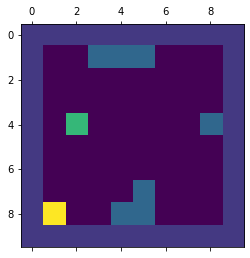

In [13]:
model = PPO1.load("models/{}".format('DQN_WebotFakeMini_TRPO_pj1_nReward2_200000'))
env = MyEnv()
obs = env.reset()

env.render()
done = False
max_num_steps = 100
time = 0

In [14]:
for i in range(20):
    env = MyEnv()
    for _ in range(max_num_steps):
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        if done is True:
            print(_)
            break

8
9
14
8
11
6
8
1
10
8
6
10
5
2
27
1
13
8


15


<Figure size 720x720 with 0 Axes>

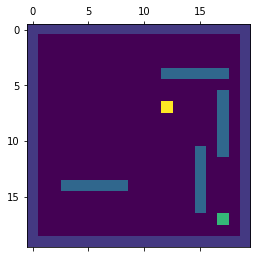

<Figure size 720x720 with 0 Axes>

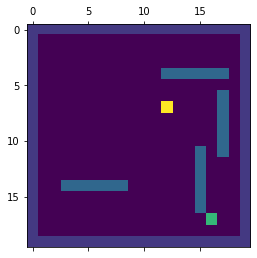

<Figure size 720x720 with 0 Axes>

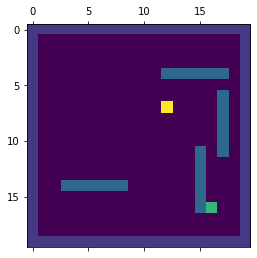

<Figure size 720x720 with 0 Axes>

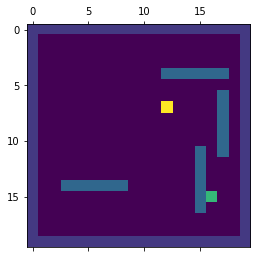

<Figure size 720x720 with 0 Axes>

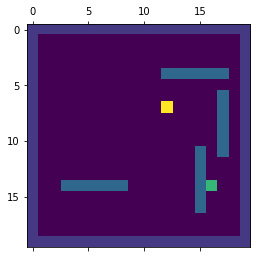

<Figure size 720x720 with 0 Axes>

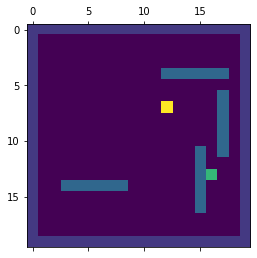

<Figure size 720x720 with 0 Axes>

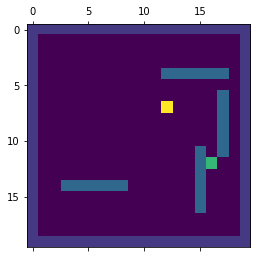

<Figure size 720x720 with 0 Axes>

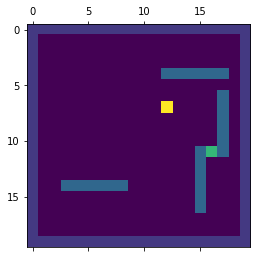

<Figure size 720x720 with 0 Axes>

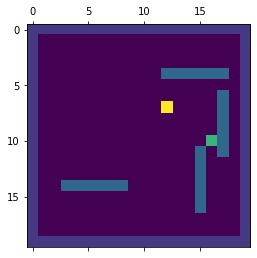

<Figure size 720x720 with 0 Axes>

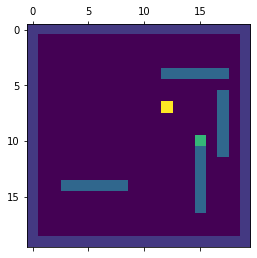

<Figure size 720x720 with 0 Axes>

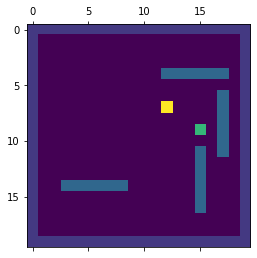

<Figure size 720x720 with 0 Axes>

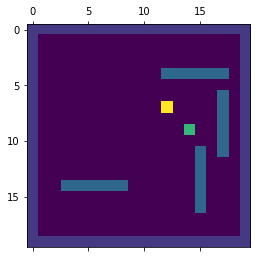

<Figure size 720x720 with 0 Axes>

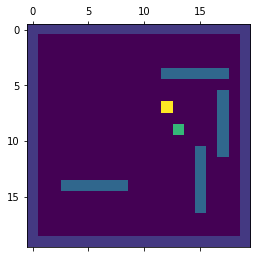

<Figure size 720x720 with 0 Axes>

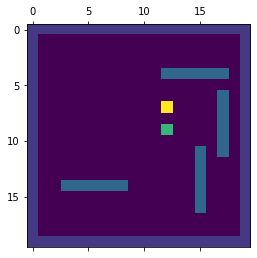

<Figure size 720x720 with 0 Axes>

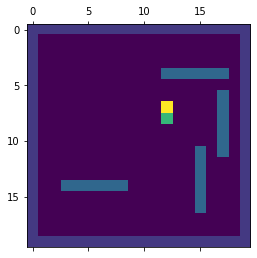

<Figure size 720x720 with 0 Axes>

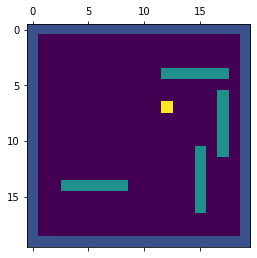

In [40]:
env = MyEnv(N=20)
for _ in range(max_num_steps):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done is True:
        print(_)
        break